## Abstract

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.



Dataset- https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/input

**NOTE - PLEASE DOWNLOAD THE DATASET AND PUT IT IN THE DIRECTORY OF THE NOTEBOOK** - SINCE IT IS LARGE DATASET

In [2]:
!unzip creditcard.csv.zip

Archive:  creditcard.csv.zip
  inflating: creditcard.csv          


In [3]:
import pandas as pd
data = pd.read_csv("/Users/sathwik/Desktop/Fraud_Detection_ensemble/creditcard.csv")

# Dataset Exploration

In [103]:
print(f"Dataset shape:- \n{data.shape}")

Dataset shape:- 
(284807, 31)


In [104]:
#describing
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [105]:
print(f"Data features or columns:- \n{data.columns}")

Data features or columns:- 
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


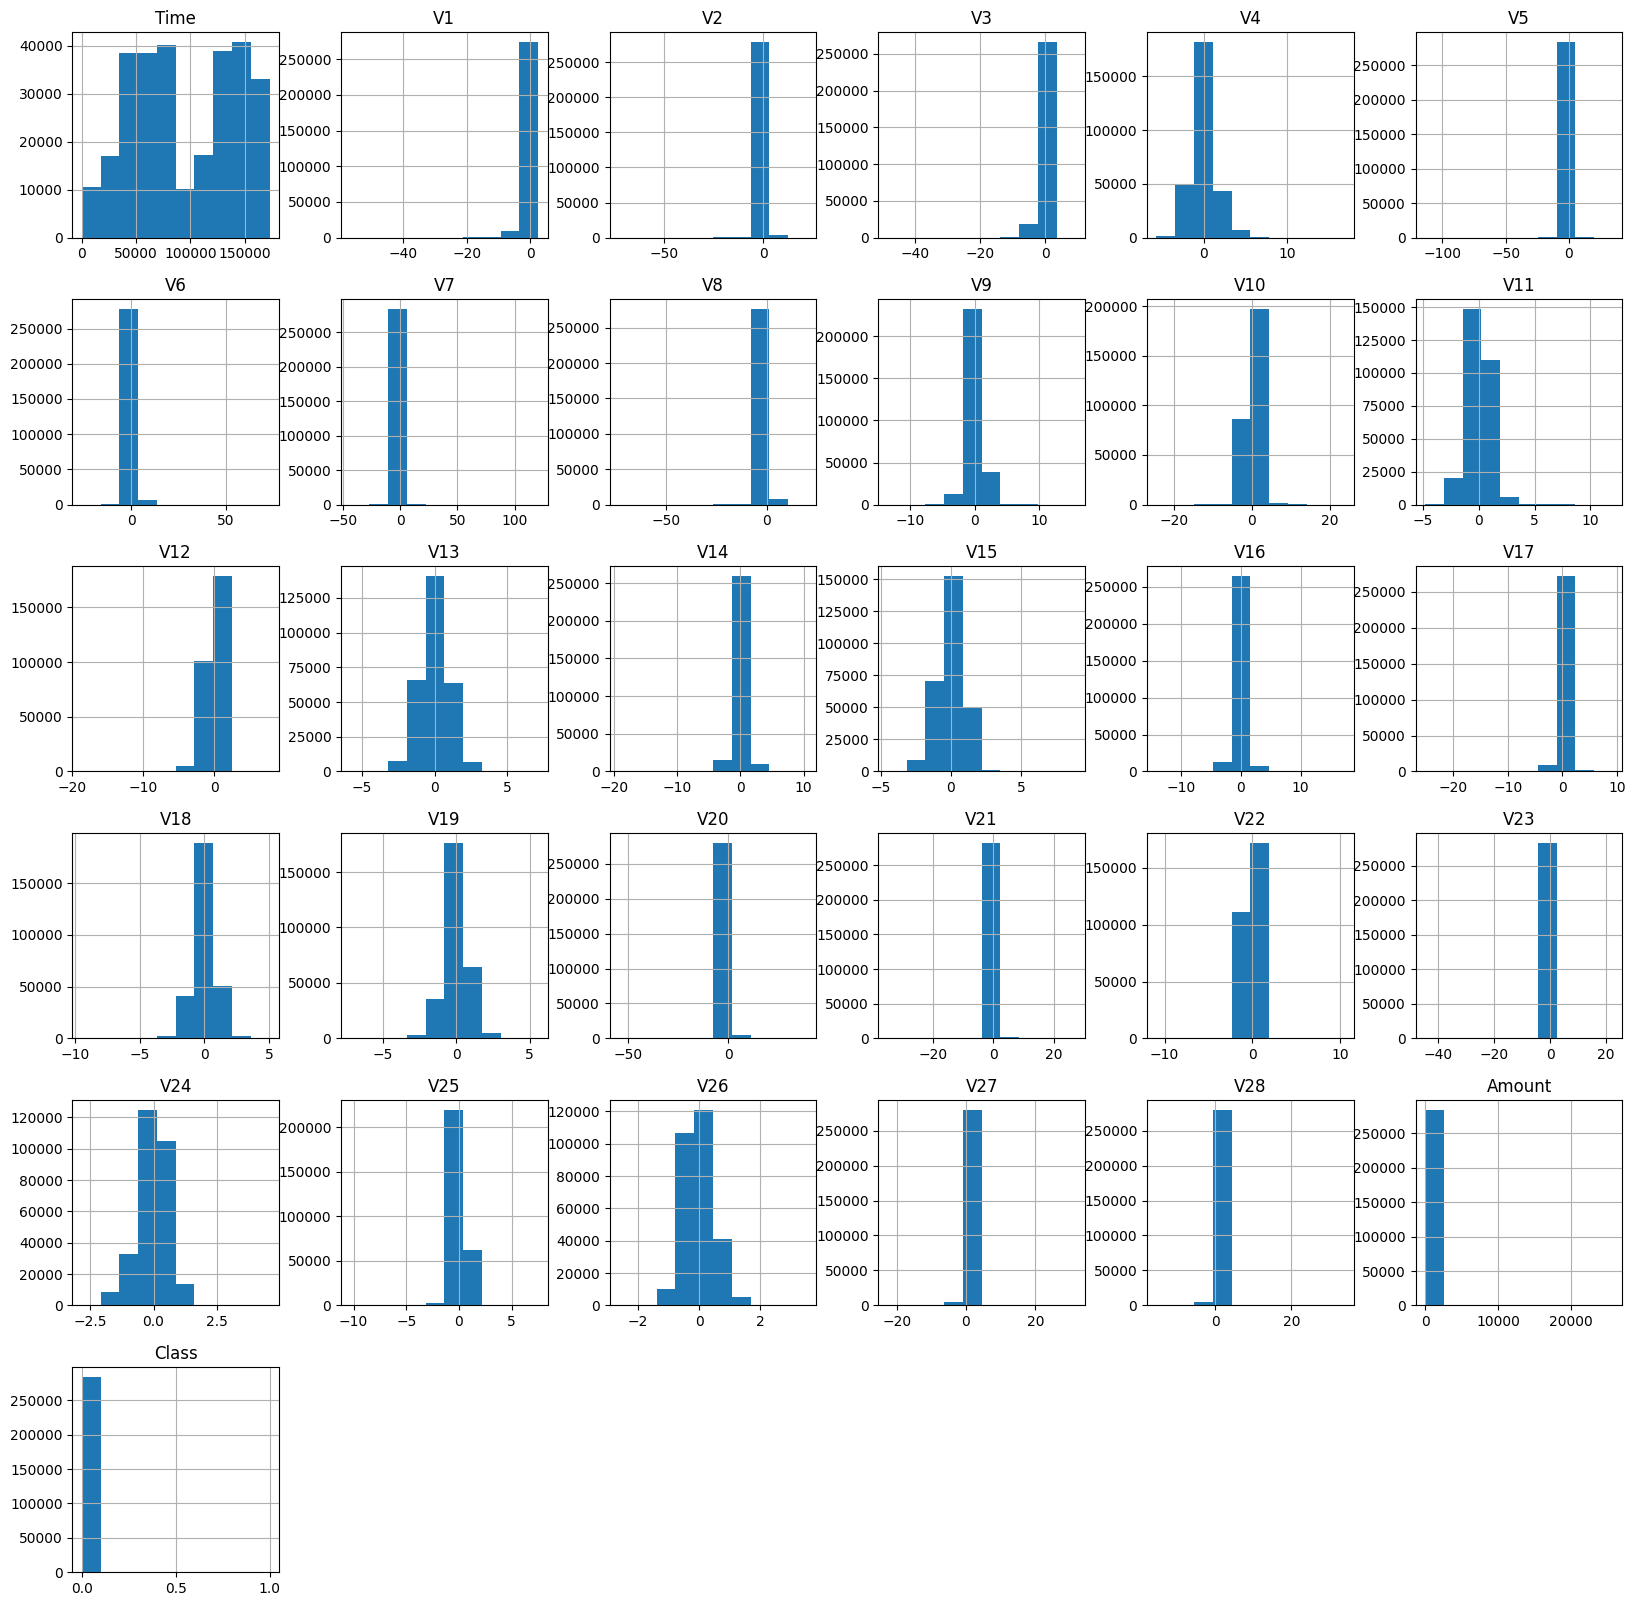

In [106]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

data.hist(figsize = (20, 20))
plt.show()

## Heatmap

Creating a heatmap is a great way to visualize the relationship between variables in your dataset, often used to display correlation matrices. Here’s how you can create a heatmap using Python’s seaborn and matplotlib libraries.



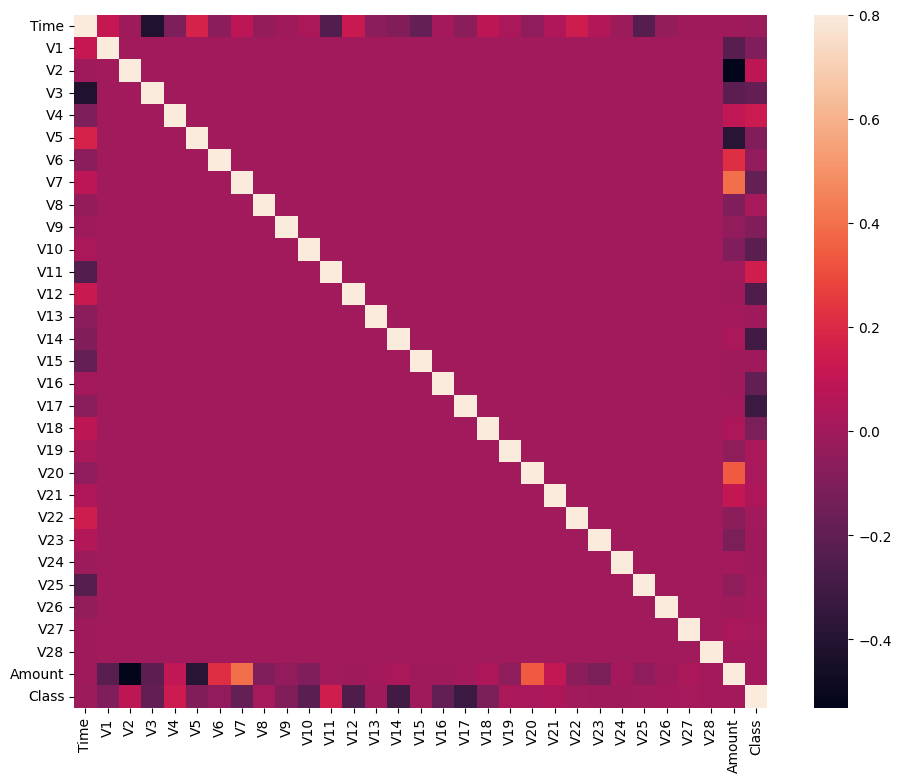

In [107]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [108]:
print(f"Unique values of target variable:- \n{data['Class'].unique()}")
print("0 for legitimate transaction\n1 for fraud transaction")

Unique values of target variable:- 
[0 1]
0 for legitimate transaction
1 for fraud transaction


In [109]:
print(f"Number of samples under each target value:- \n{data['Class'].value_counts()}")

Number of samples under each target value:- 
Class
0    284315
1       492
Name: count, dtype: int64


In [110]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [111]:
print('Amount details of the Fraudulent Transaction')
fraud.Amount.describe()

Amount details of the Fraudulent Transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#  Data Preprocessing

In [112]:
data = data.drop(['Time'], axis = 1)
print(f"List of feature names after removing Time column:- \n{data.columns}")

List of feature names after removing Time column:- 
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [113]:
print("Dataset info:-")
print(data.info())

Dataset info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64


## Likely distributions QQ plot

<Figure size 800x500 with 0 Axes>

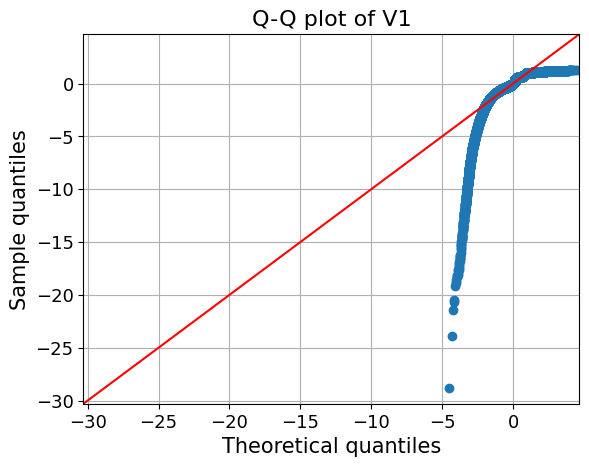

<Figure size 800x500 with 0 Axes>

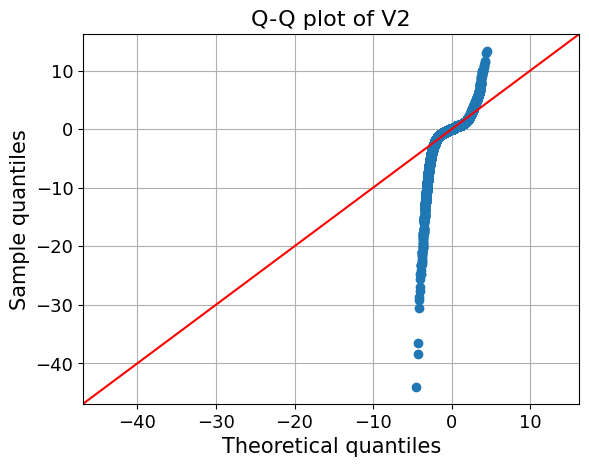

<Figure size 800x500 with 0 Axes>

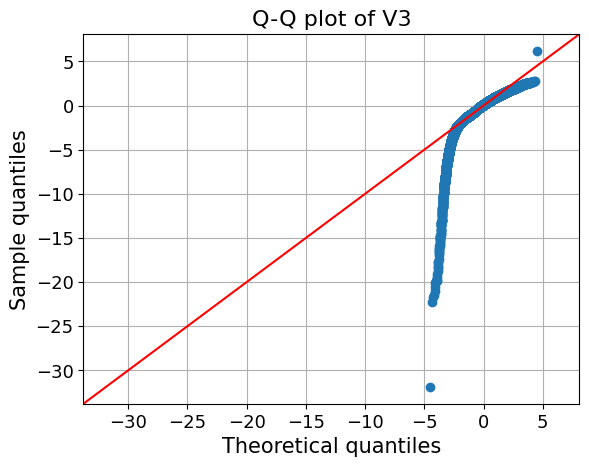

<Figure size 800x500 with 0 Axes>

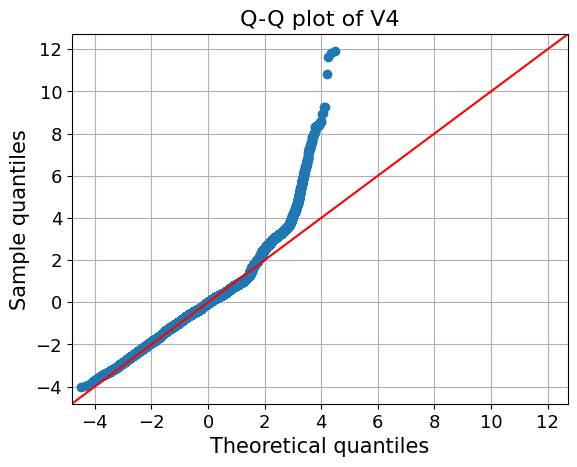

<Figure size 800x500 with 0 Axes>

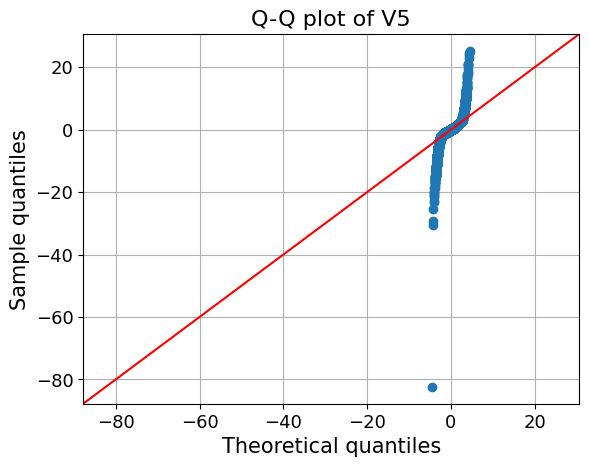

<Figure size 800x500 with 0 Axes>

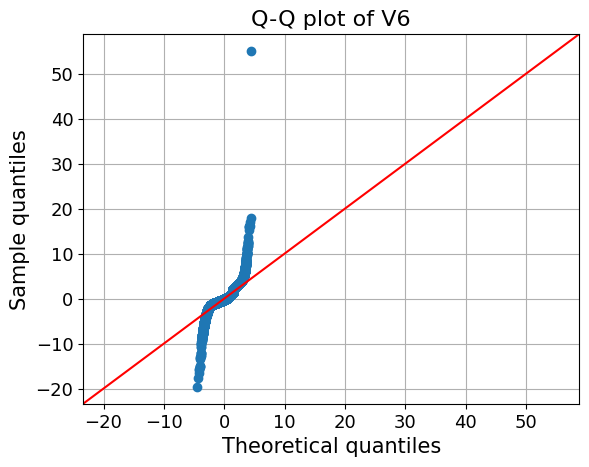

<Figure size 800x500 with 0 Axes>

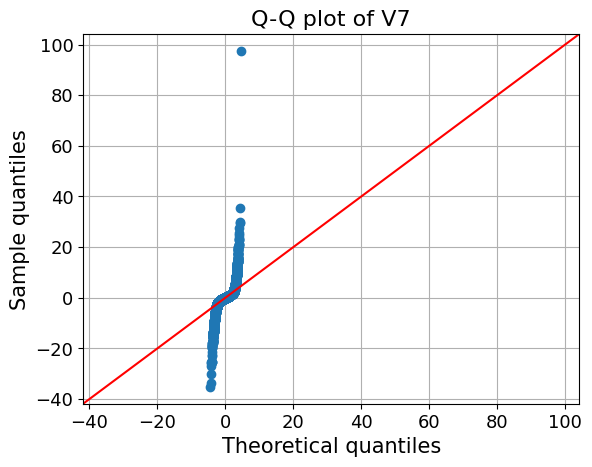

<Figure size 800x500 with 0 Axes>

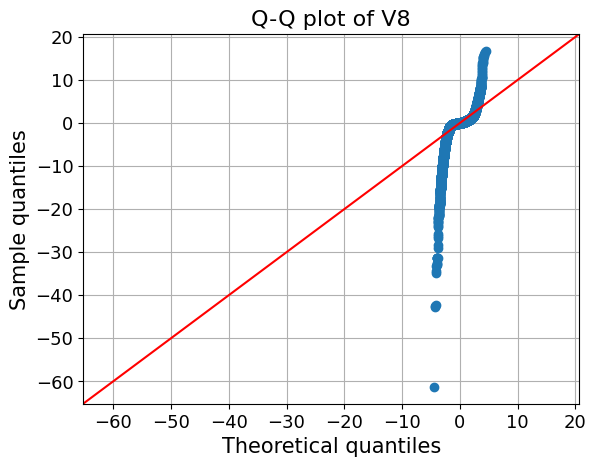

<Figure size 800x500 with 0 Axes>

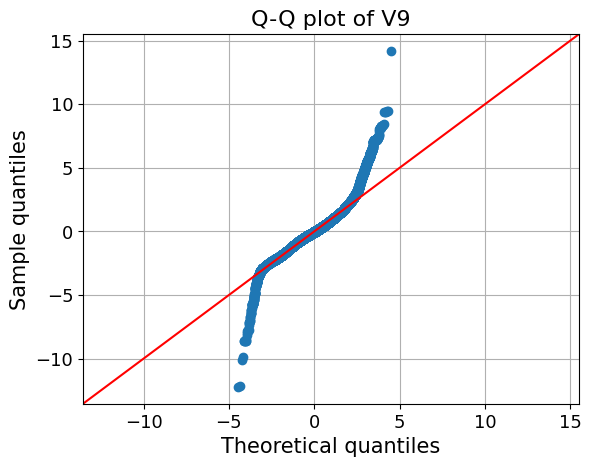

<Figure size 800x500 with 0 Axes>

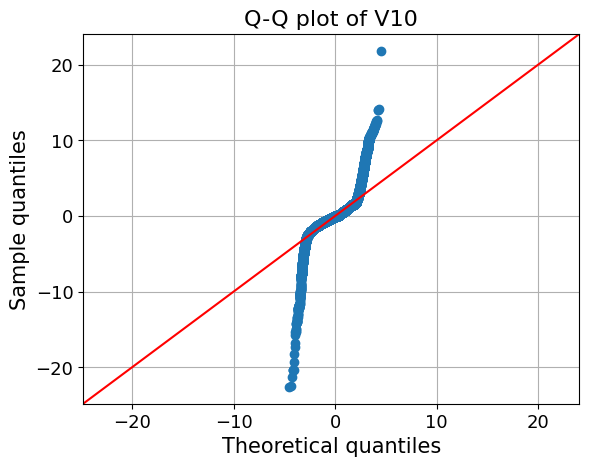

<Figure size 800x500 with 0 Axes>

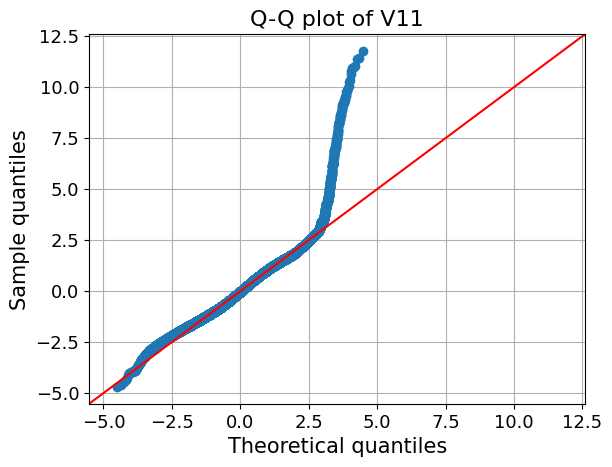

<Figure size 800x500 with 0 Axes>

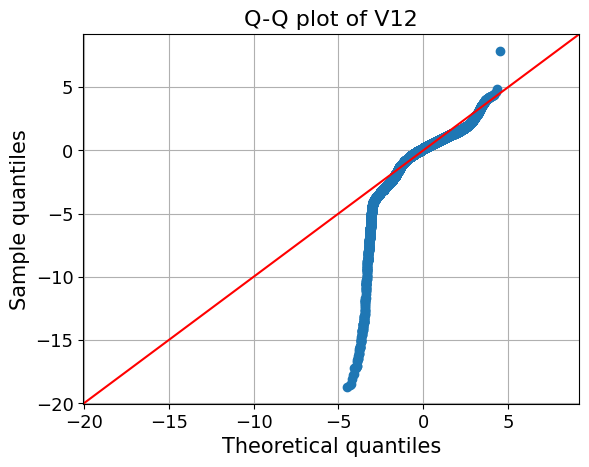

<Figure size 800x500 with 0 Axes>

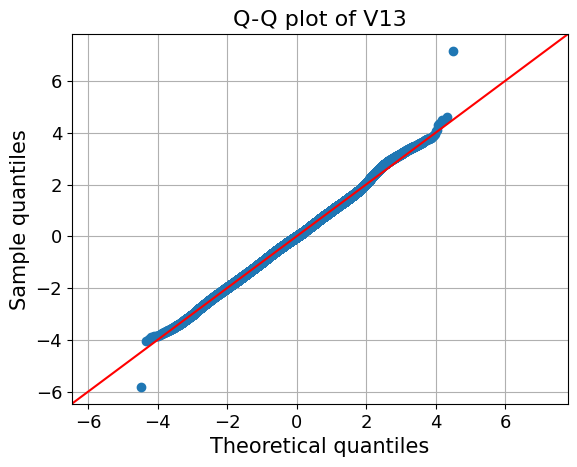

<Figure size 800x500 with 0 Axes>

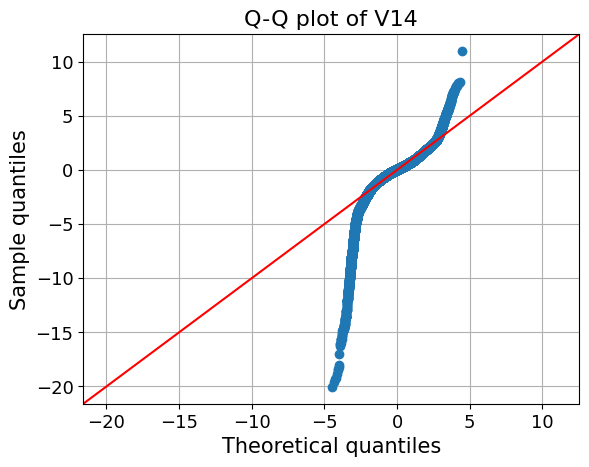

<Figure size 800x500 with 0 Axes>

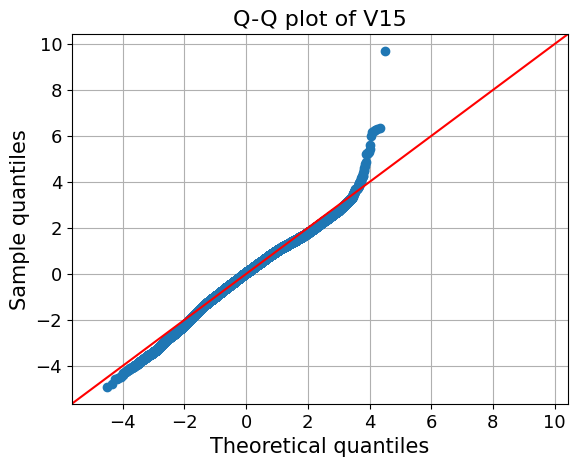

<Figure size 800x500 with 0 Axes>

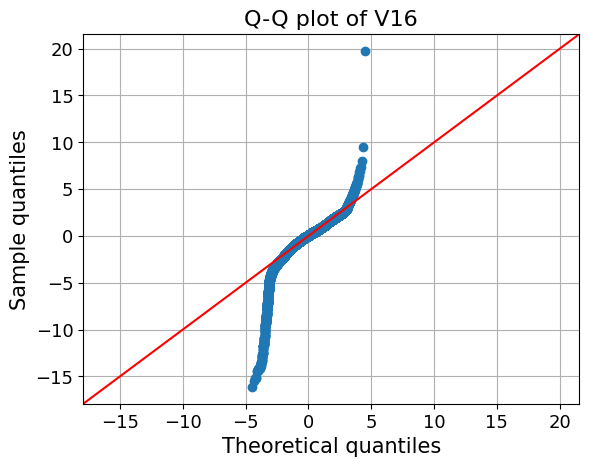

<Figure size 800x500 with 0 Axes>

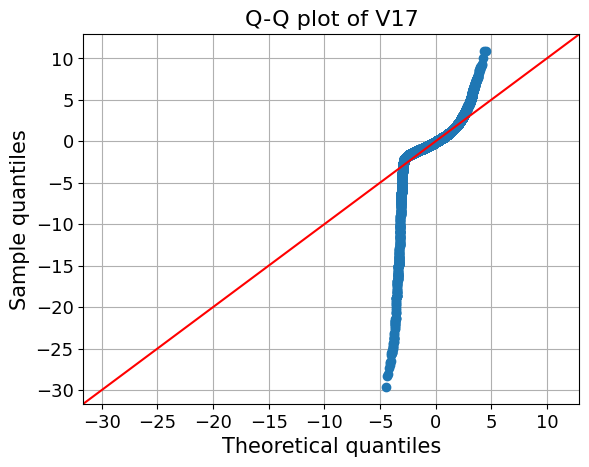

<Figure size 800x500 with 0 Axes>

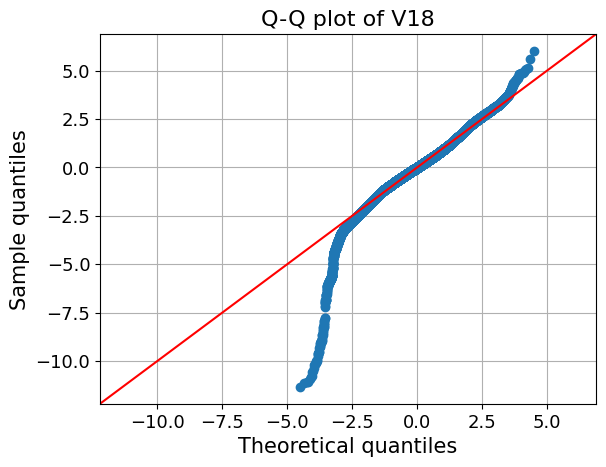

<Figure size 800x500 with 0 Axes>

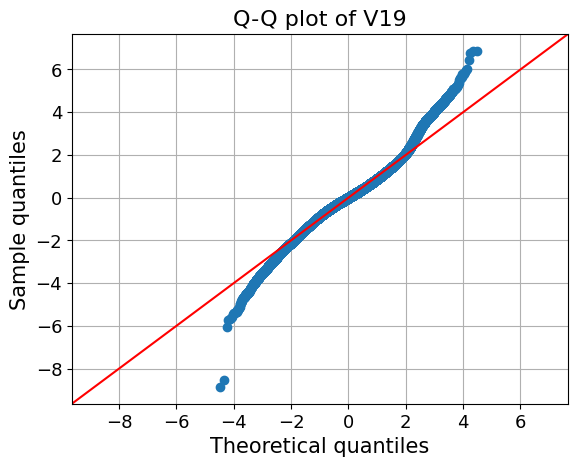

<Figure size 800x500 with 0 Axes>

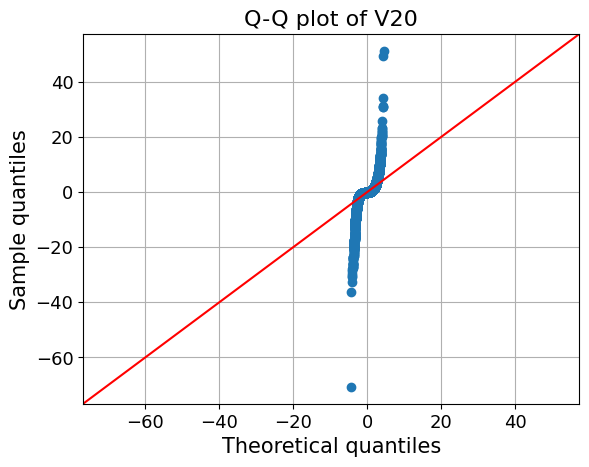

<Figure size 800x500 with 0 Axes>

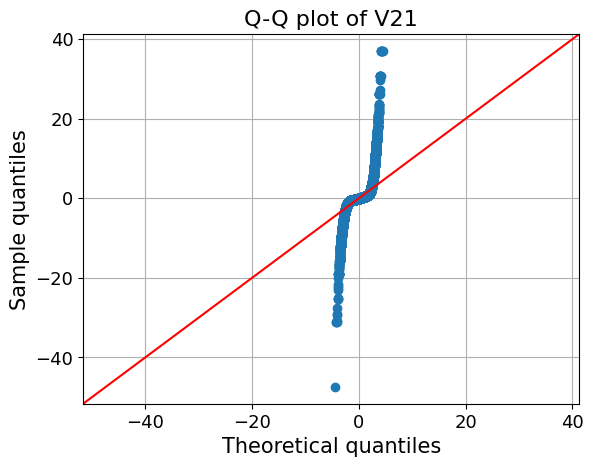

<Figure size 800x500 with 0 Axes>

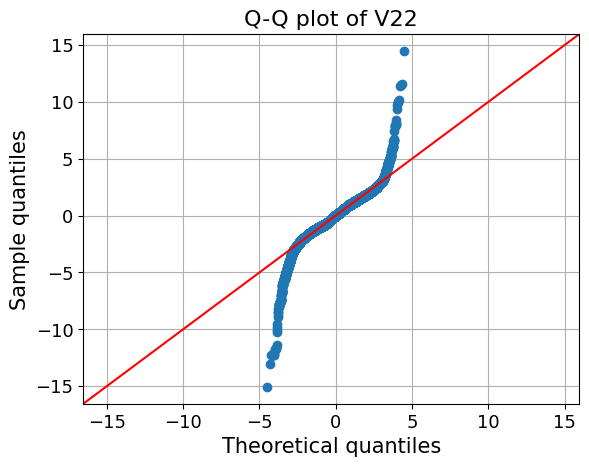

<Figure size 800x500 with 0 Axes>

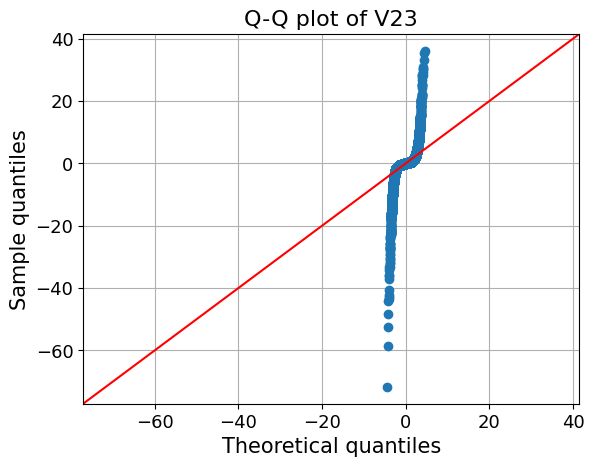

<Figure size 800x500 with 0 Axes>

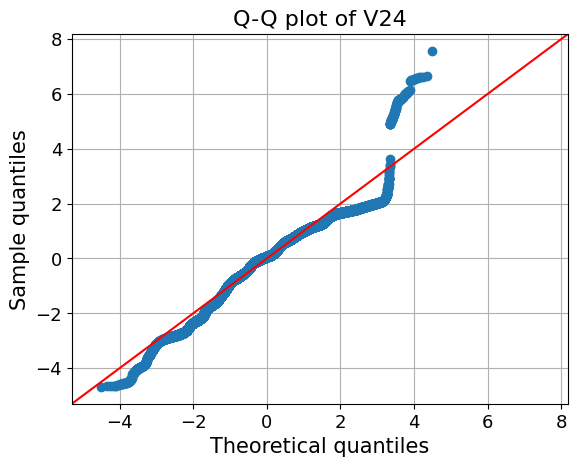

<Figure size 800x500 with 0 Axes>

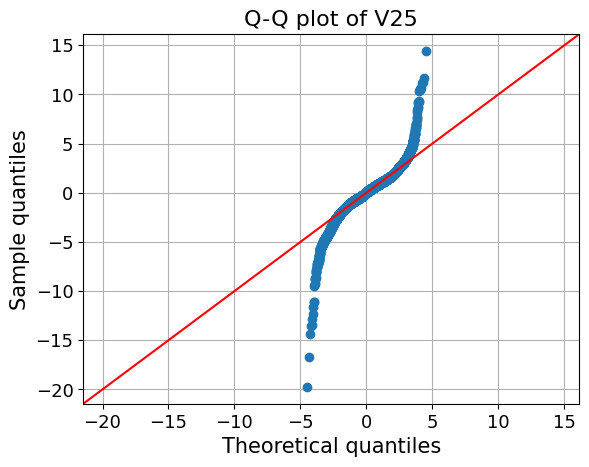

<Figure size 800x500 with 0 Axes>

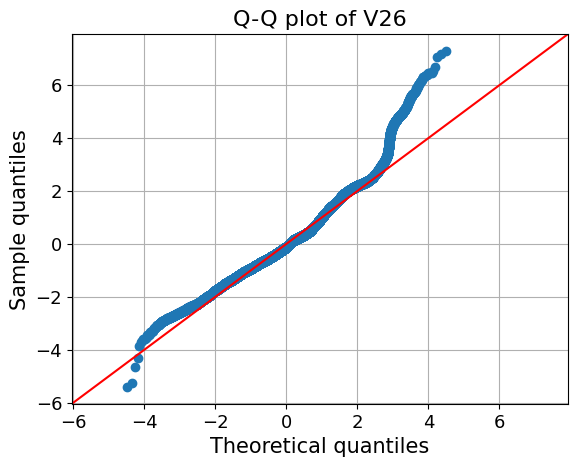

<Figure size 800x500 with 0 Axes>

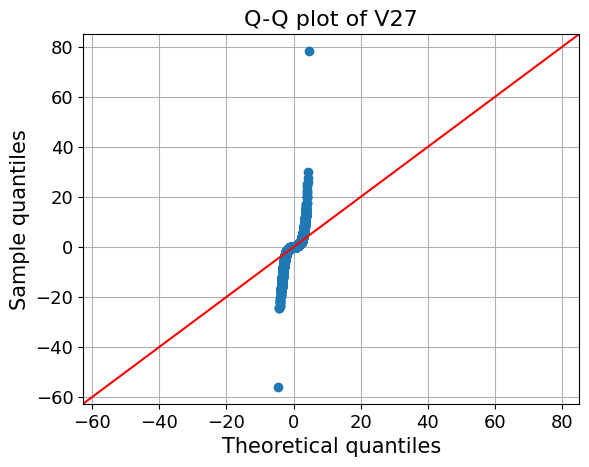

<Figure size 800x500 with 0 Axes>

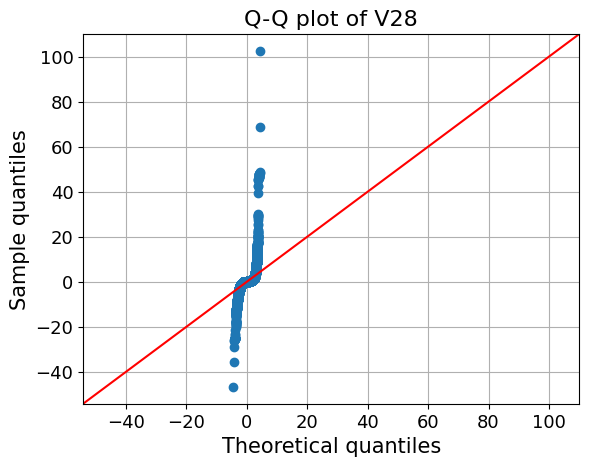

<Figure size 800x500 with 0 Axes>

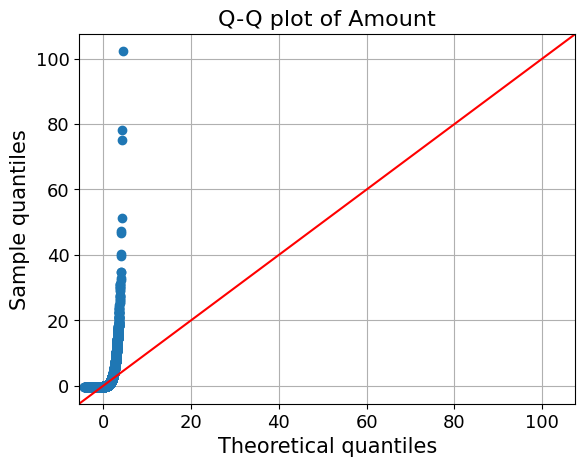

<Figure size 800x500 with 0 Axes>

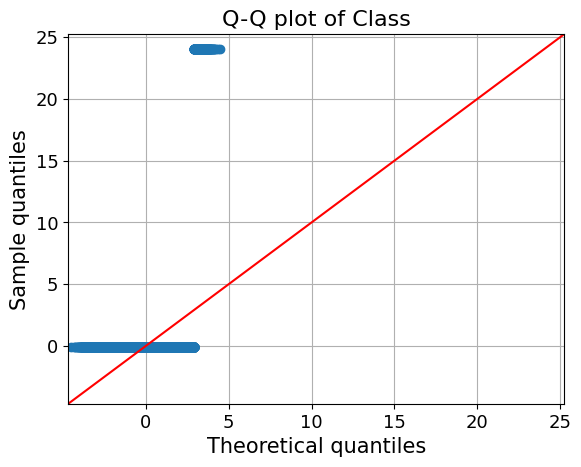

In [114]:
# checking the distribution of independent  numeric variables
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
]

# Iterate through columns and create Q-Q plots
for i in data_norm.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[i], line="45", fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(i), fontsize=16)
    plt.grid(True)
    plt.show()

## Distribution of numerical variables

In [115]:
num_list=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


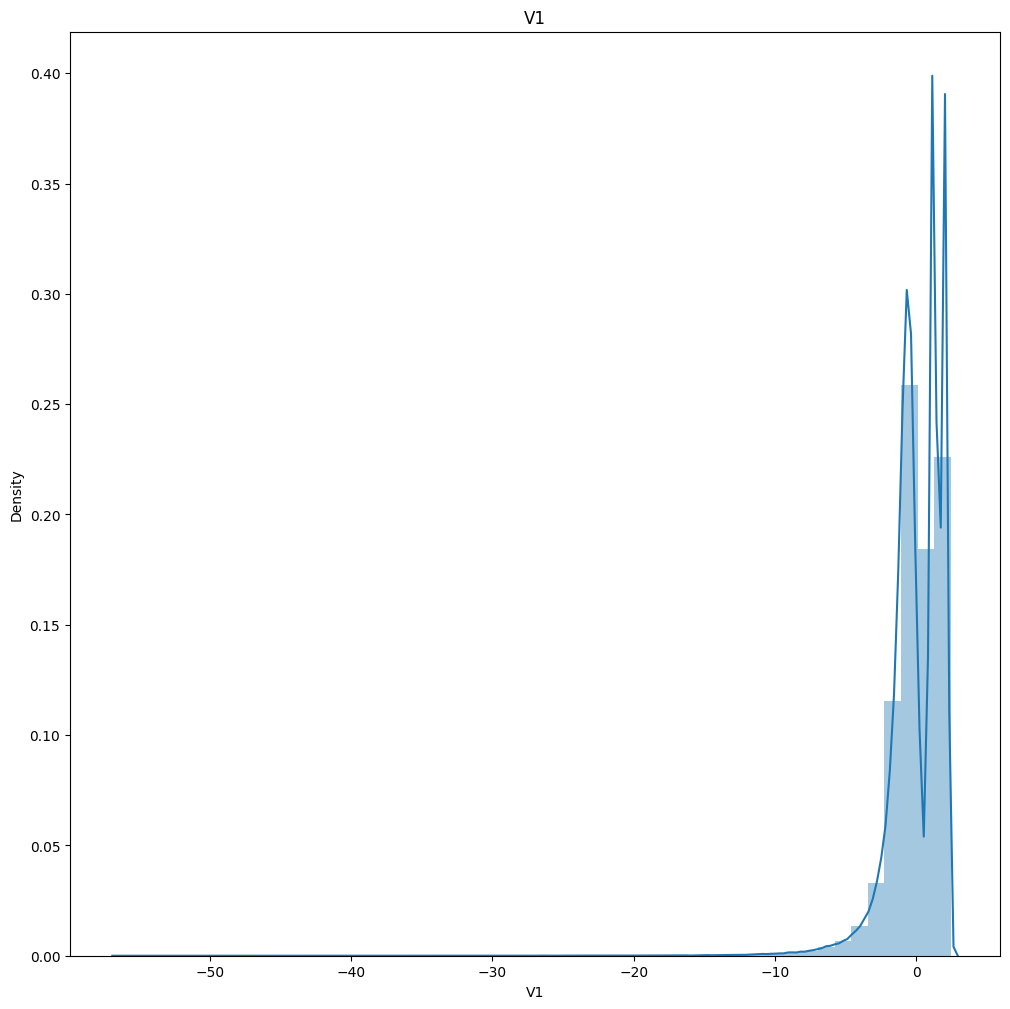

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


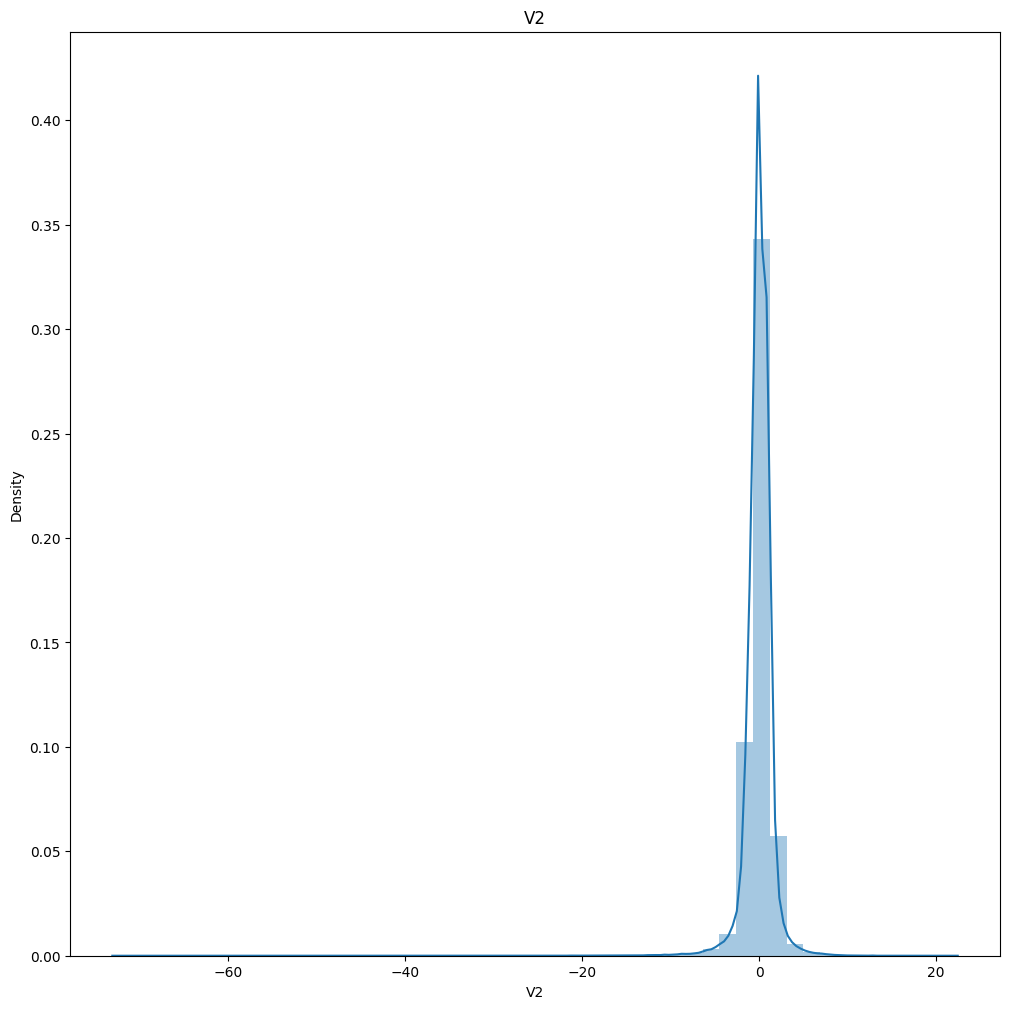

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


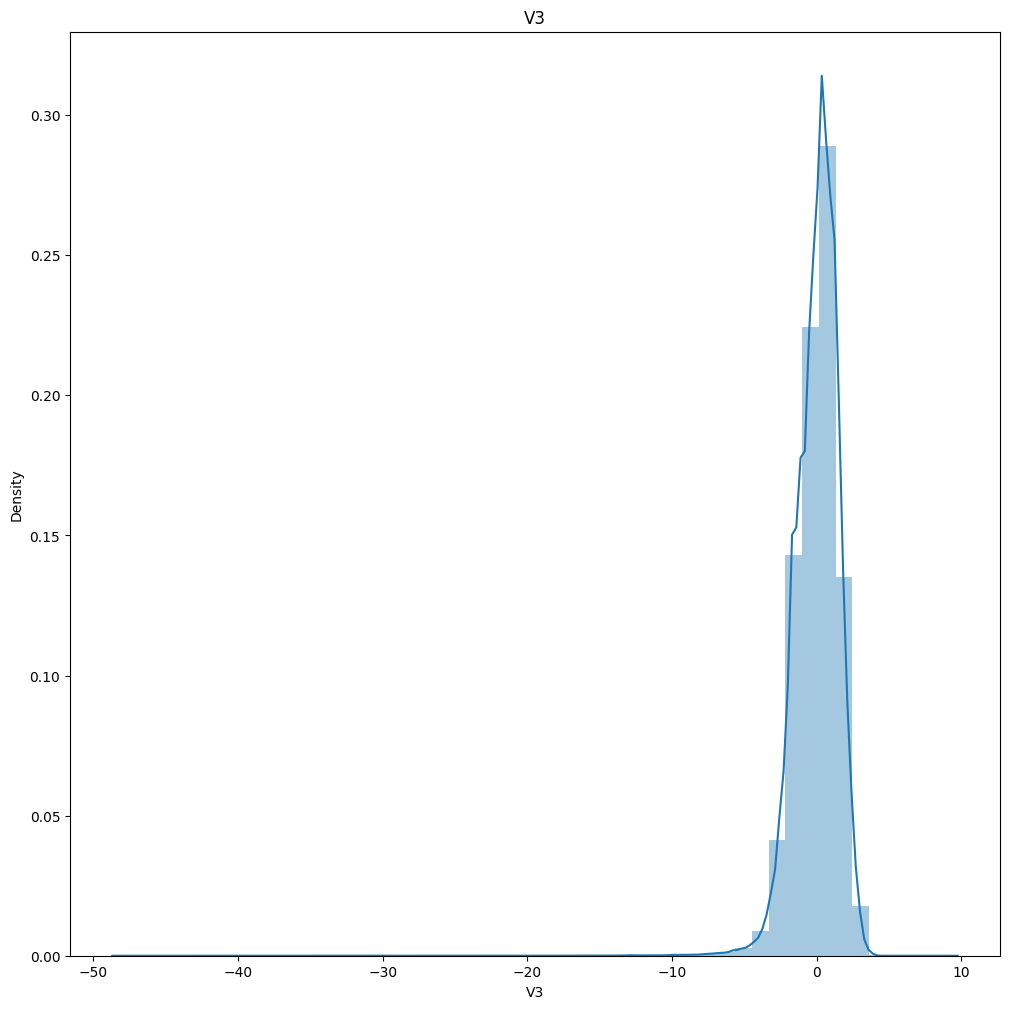

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


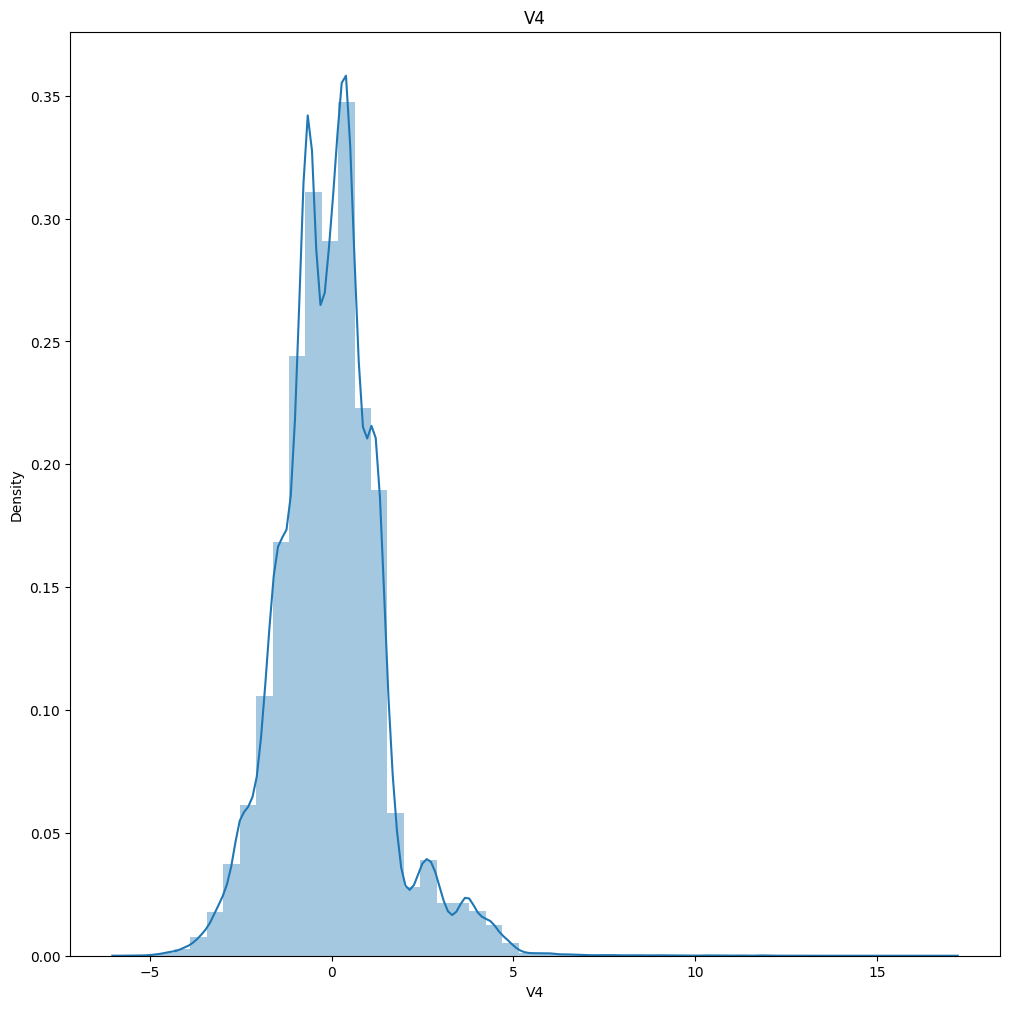

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


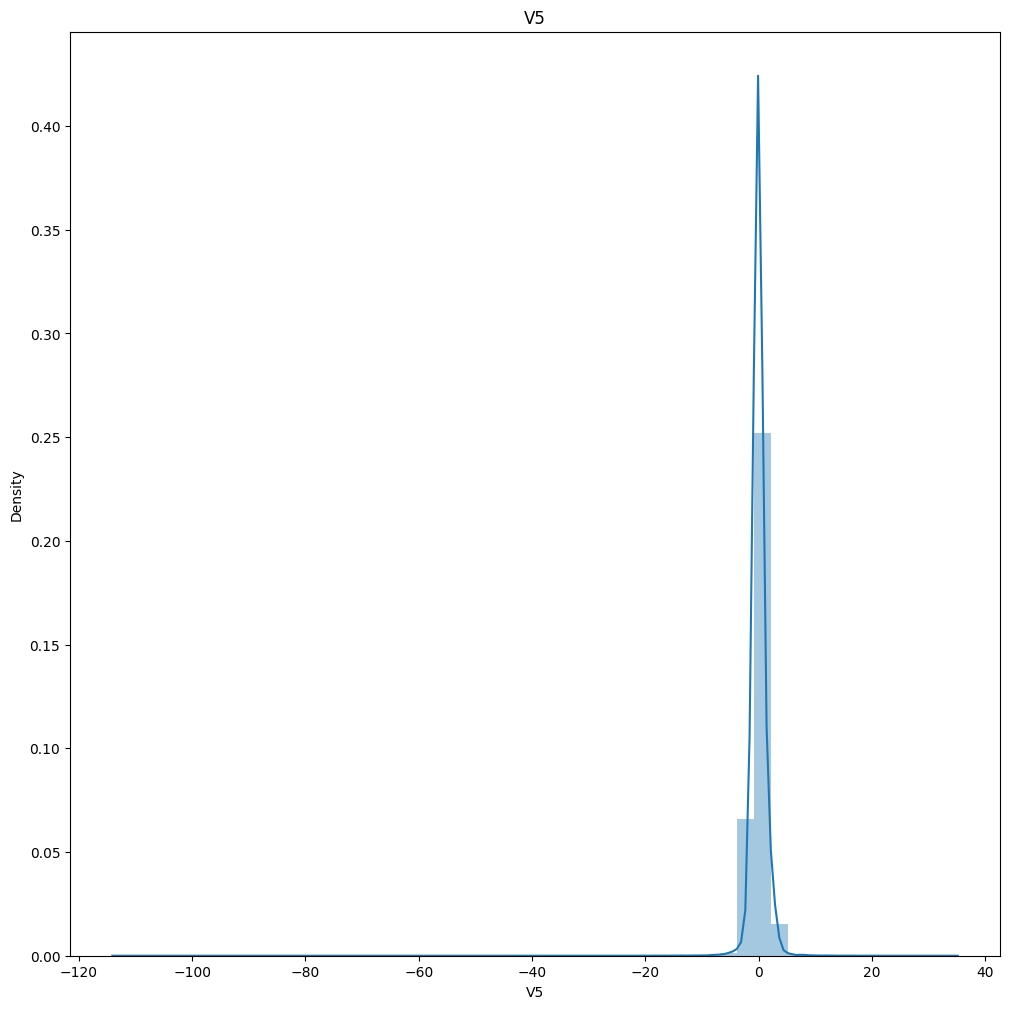

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


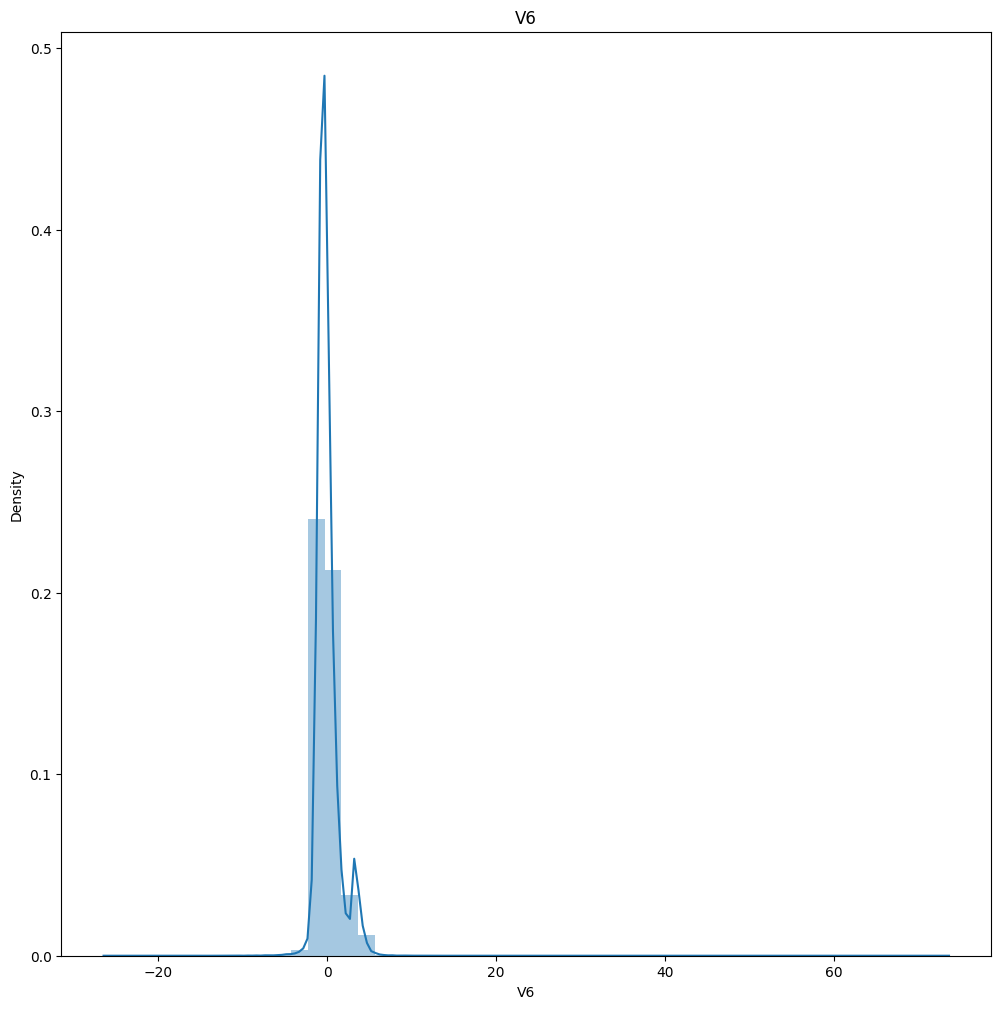

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


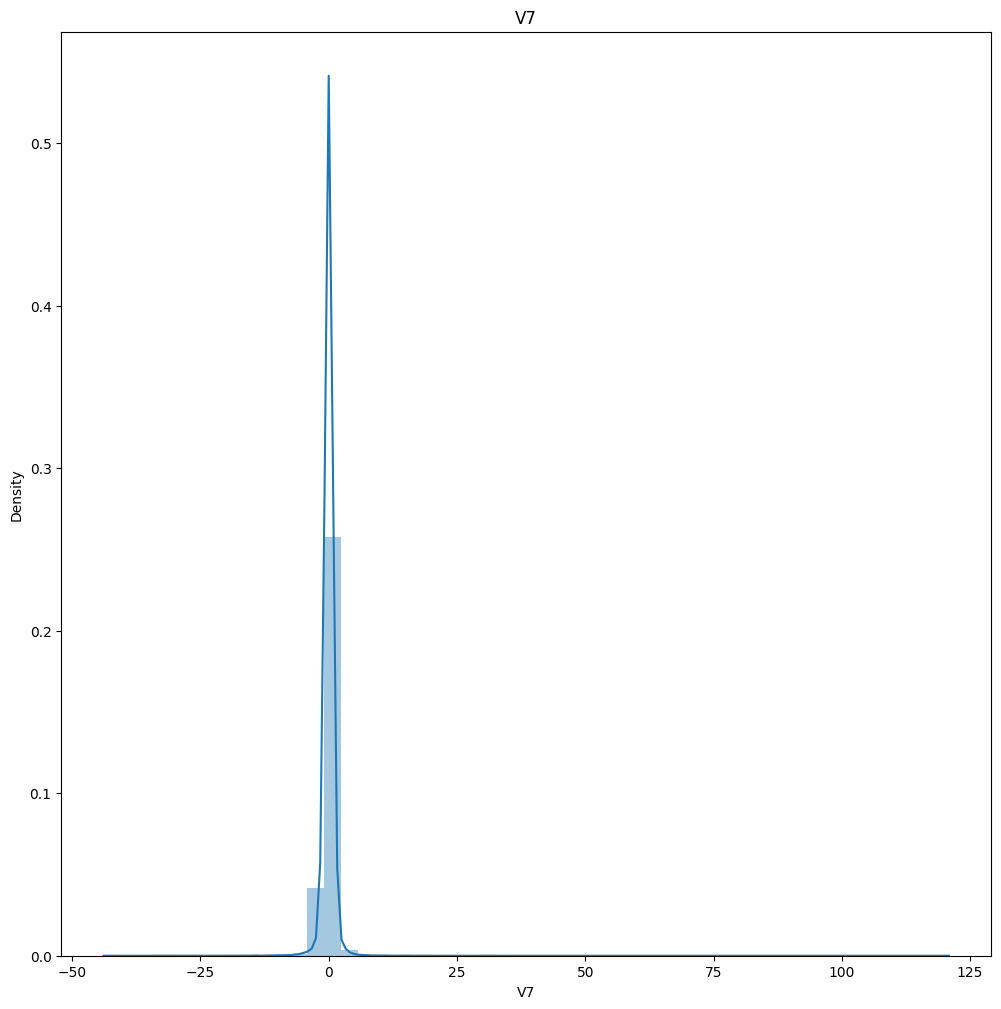

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


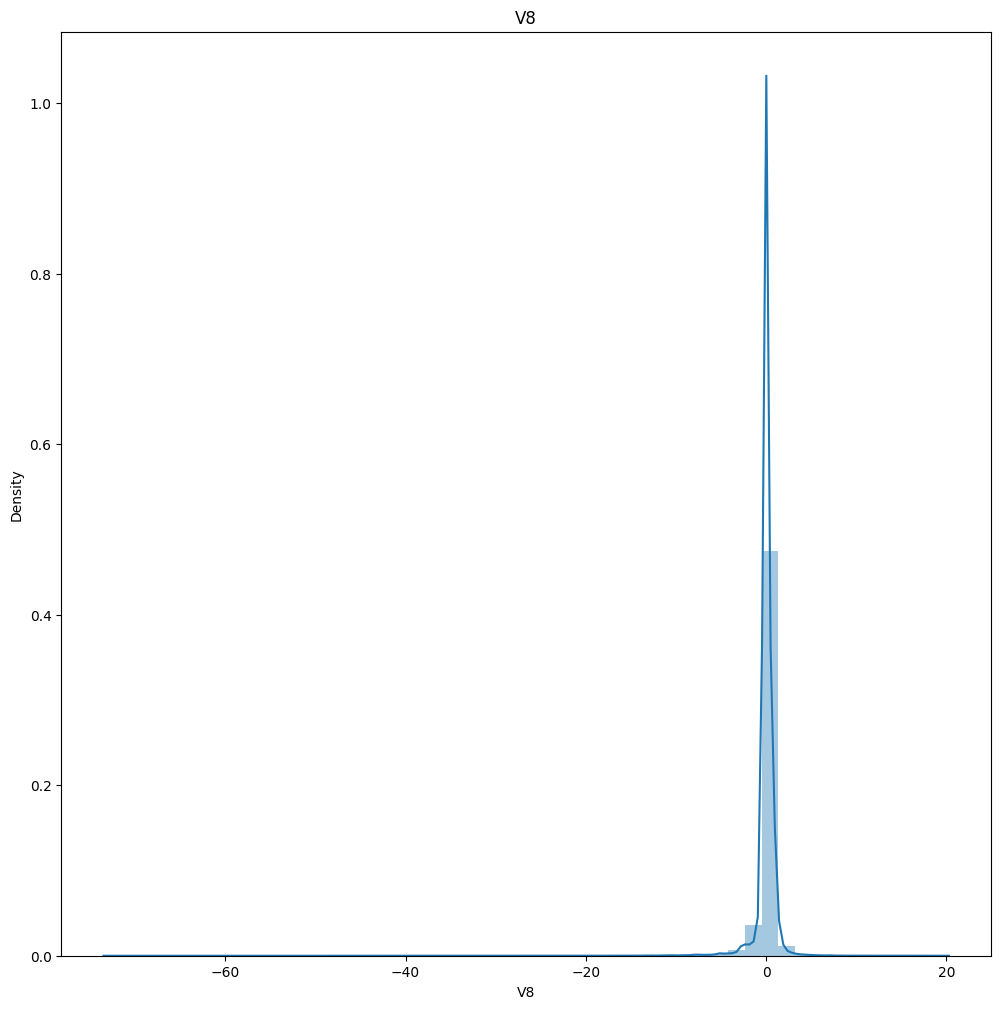

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


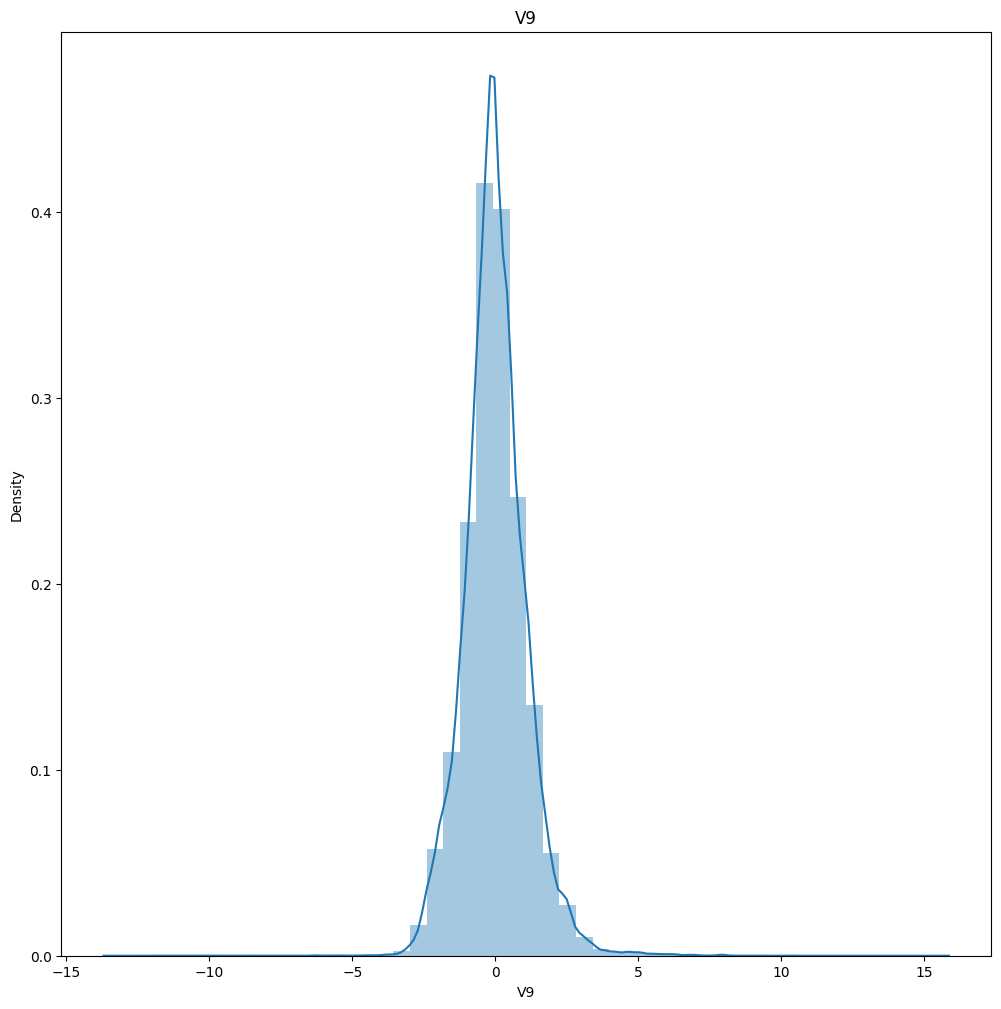

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


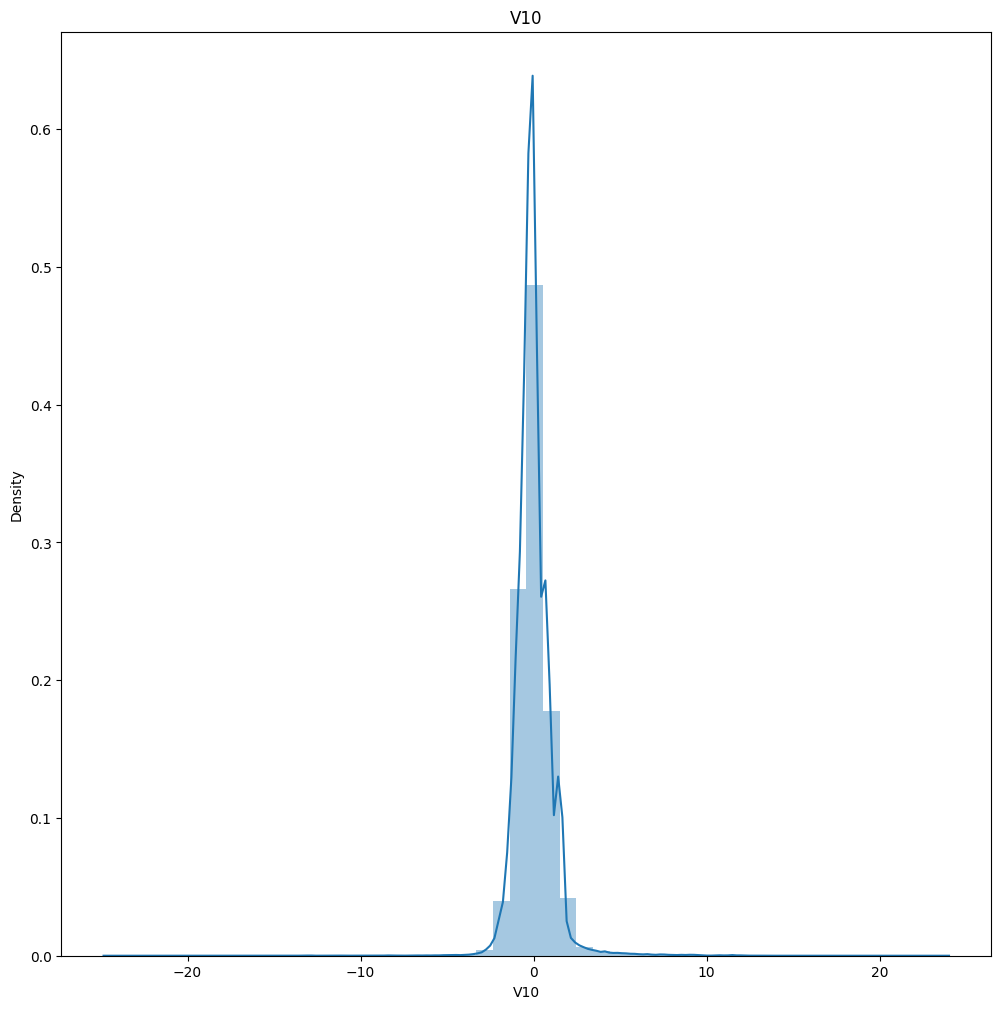

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


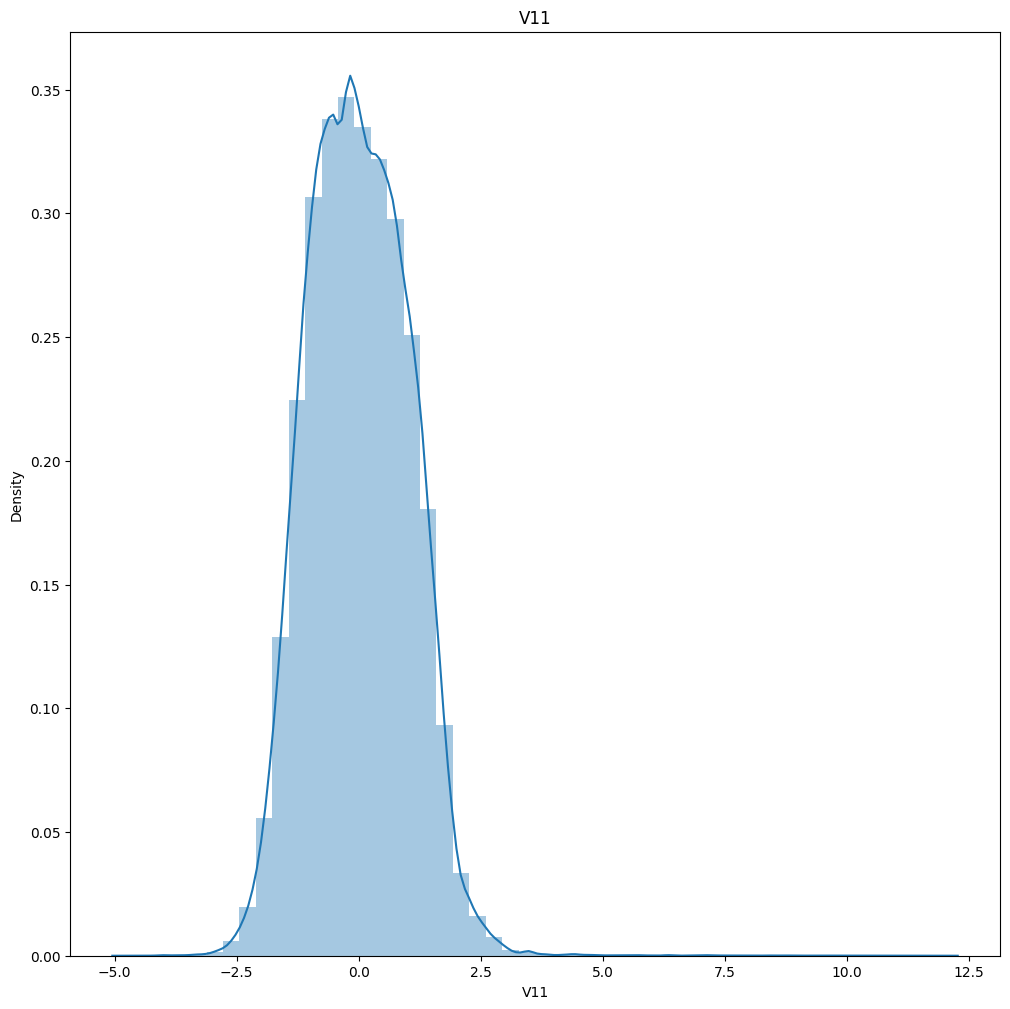

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


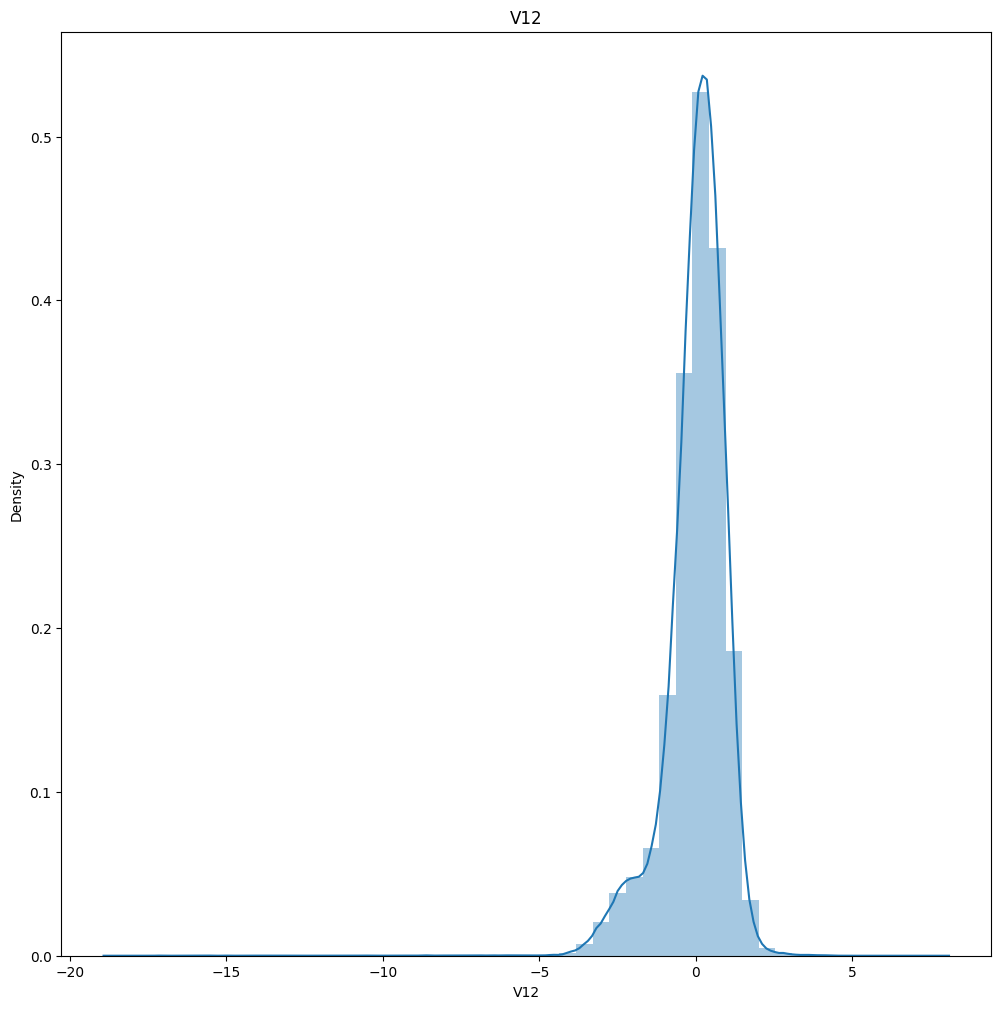

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


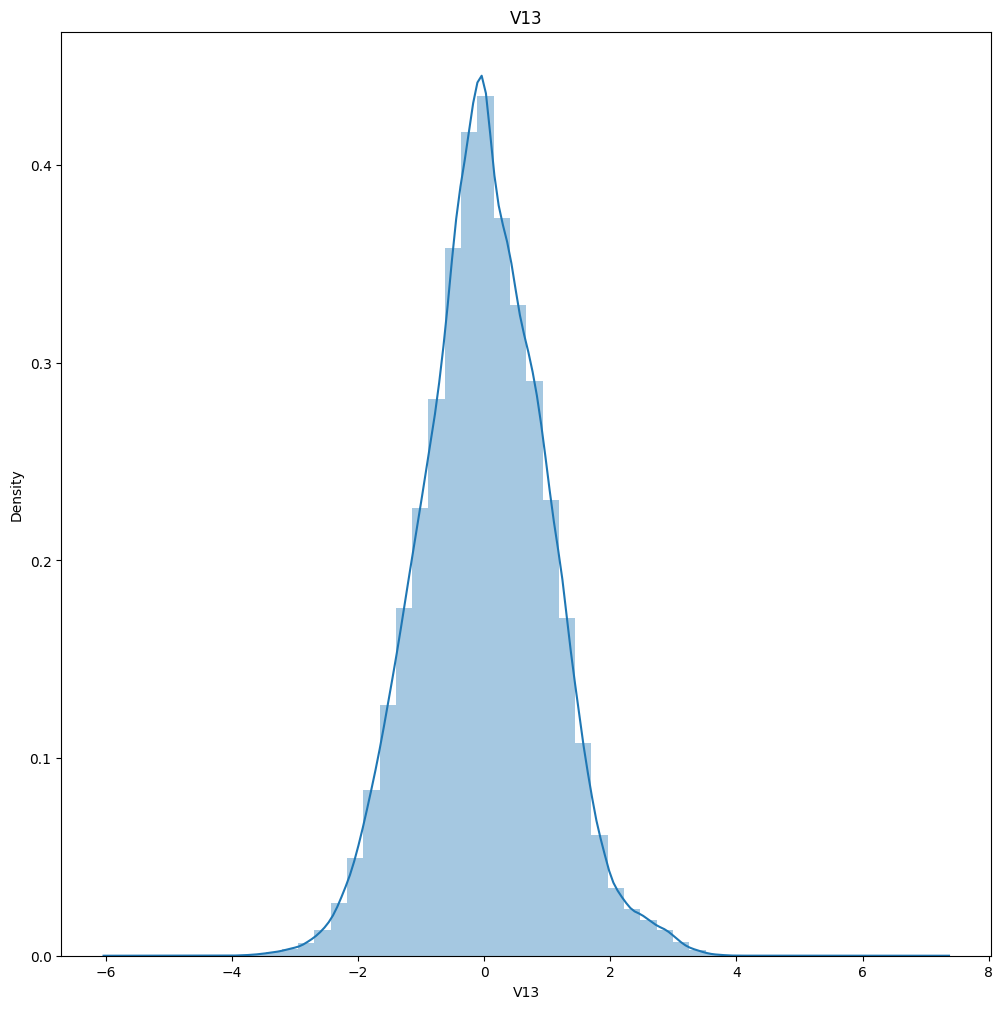

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


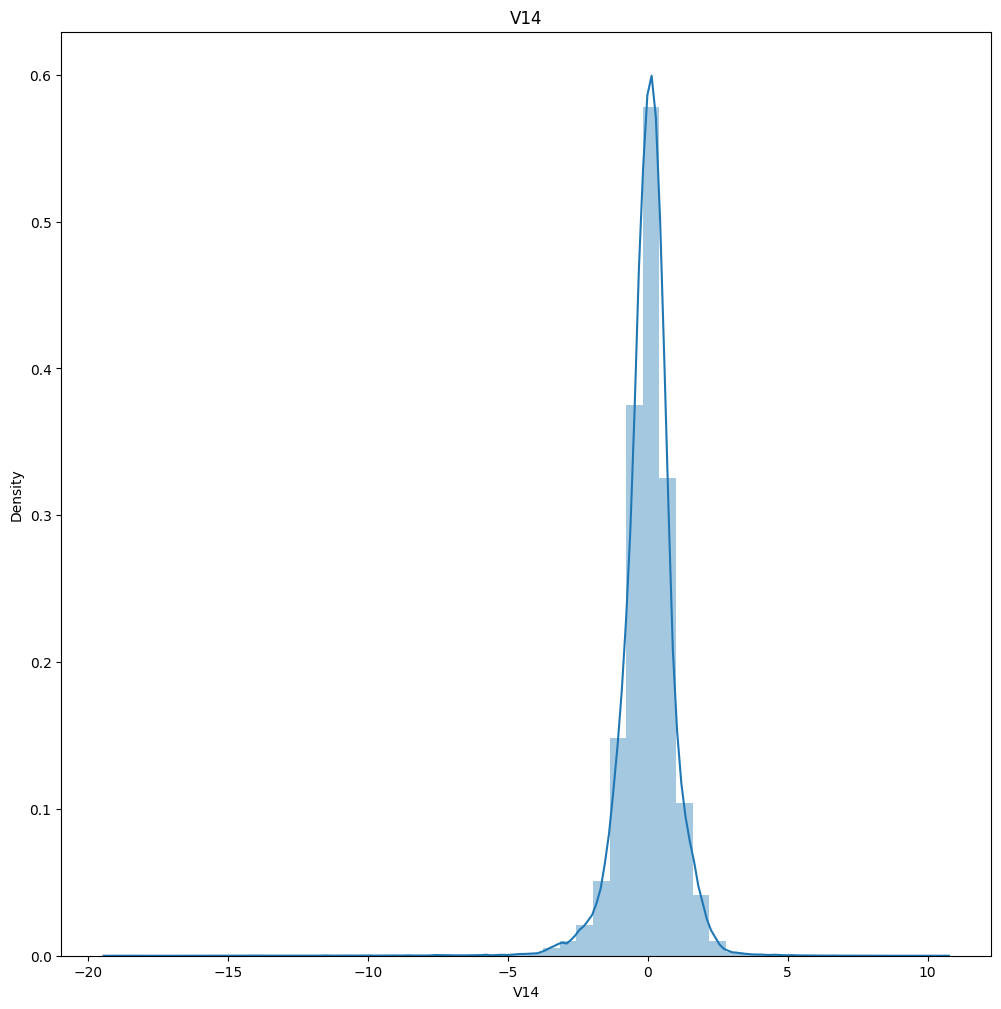

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


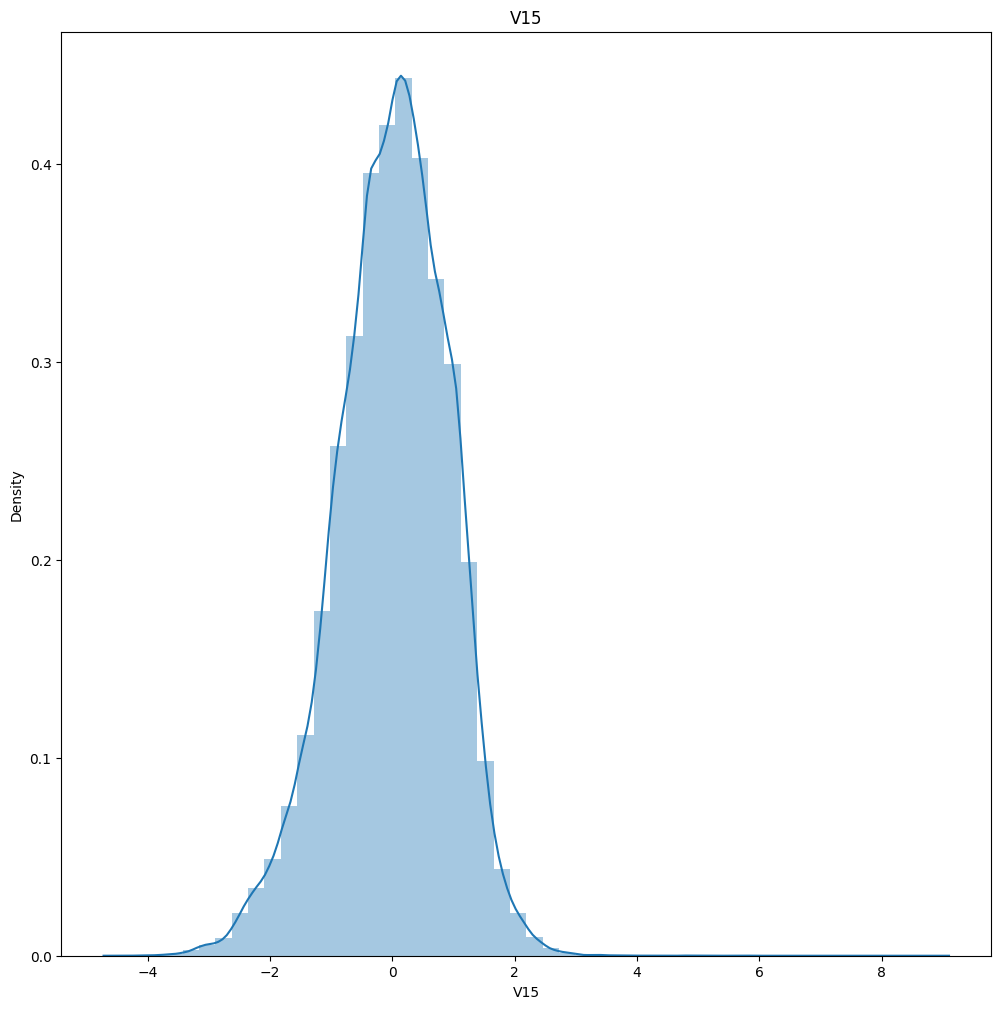

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


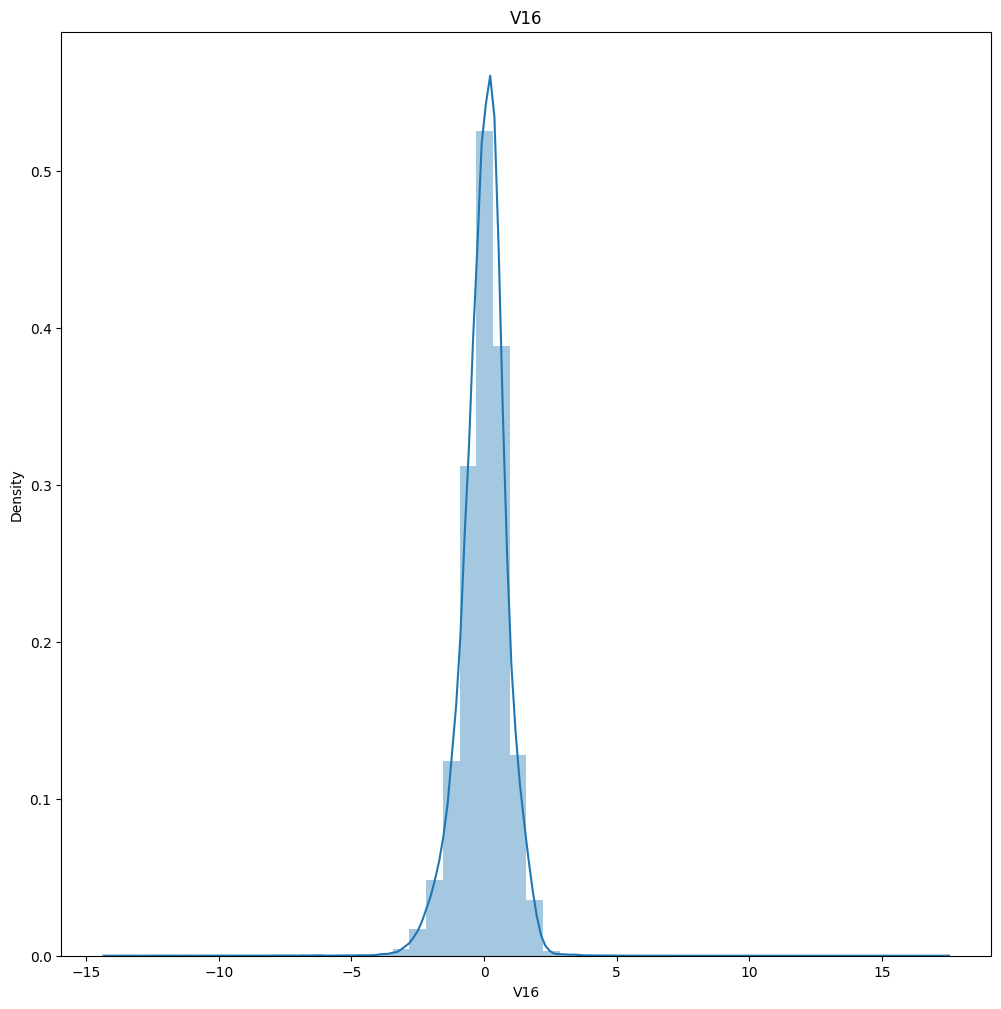

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


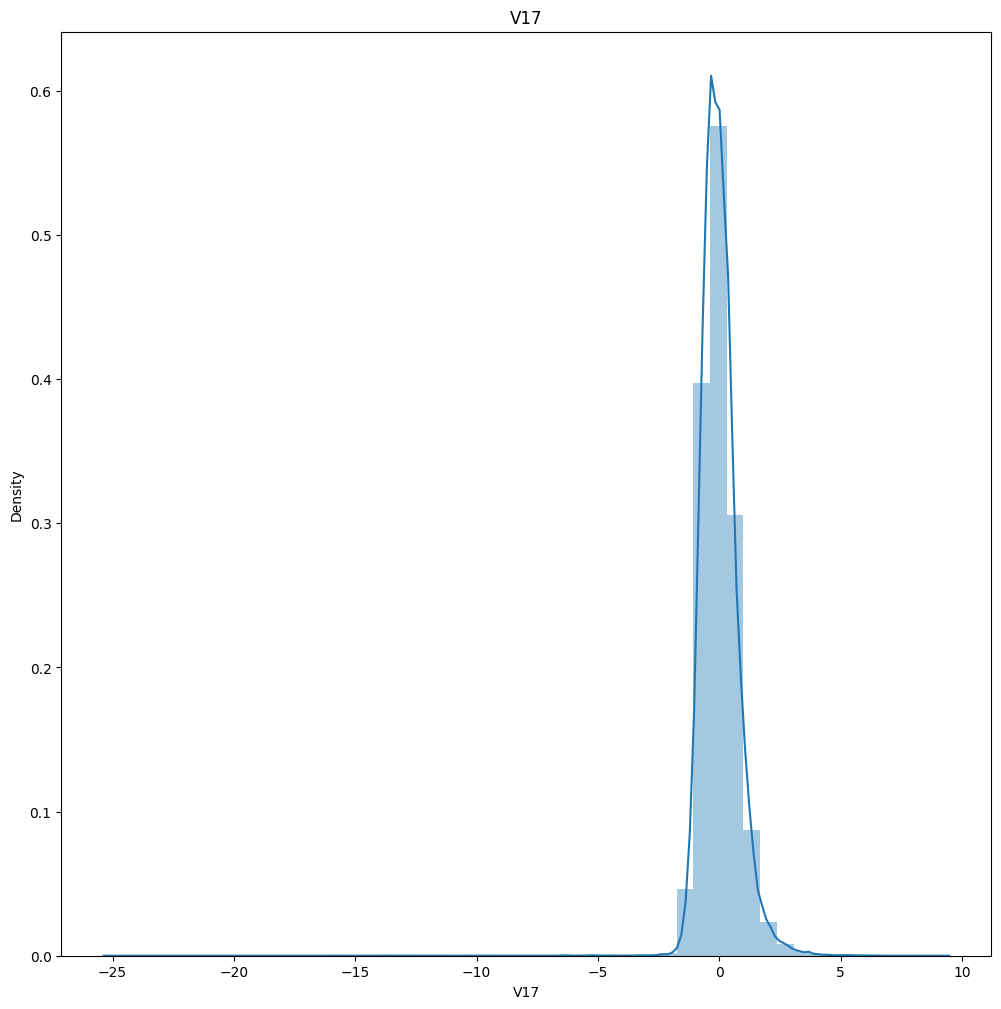

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


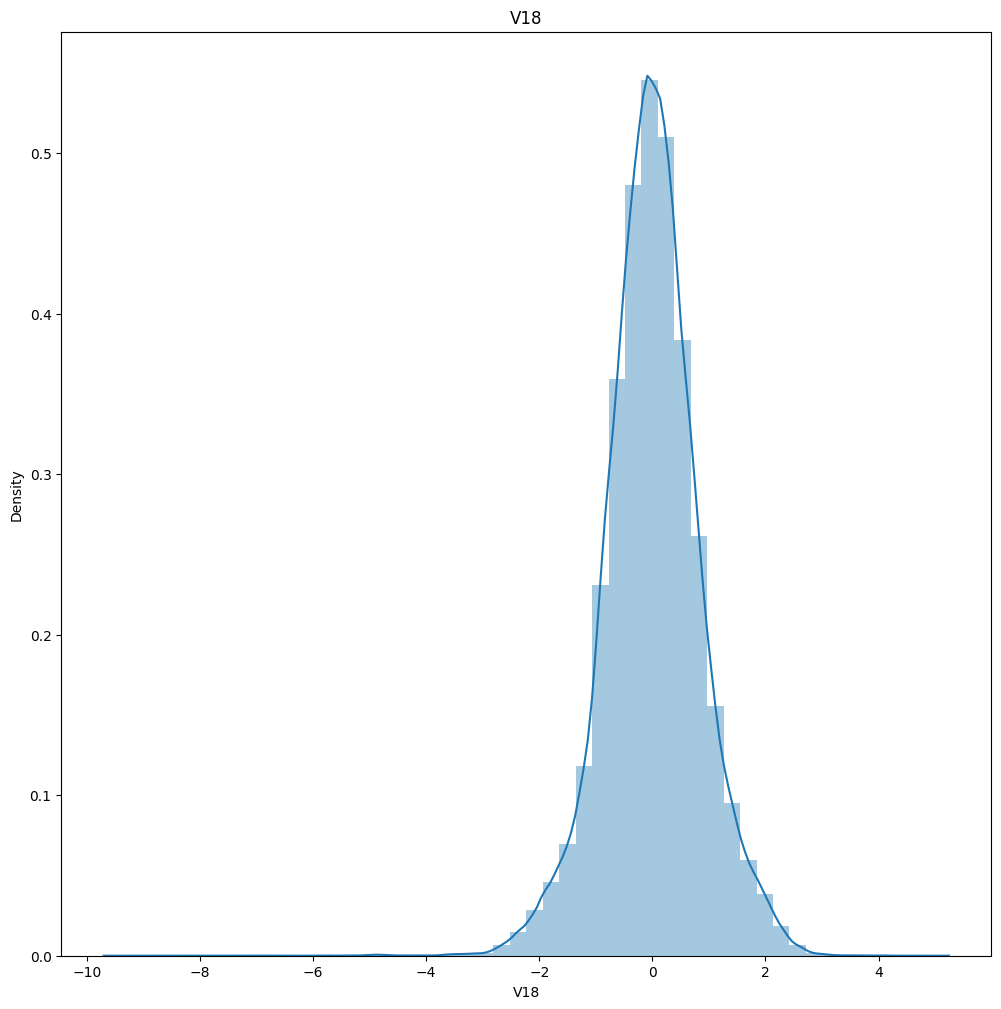

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


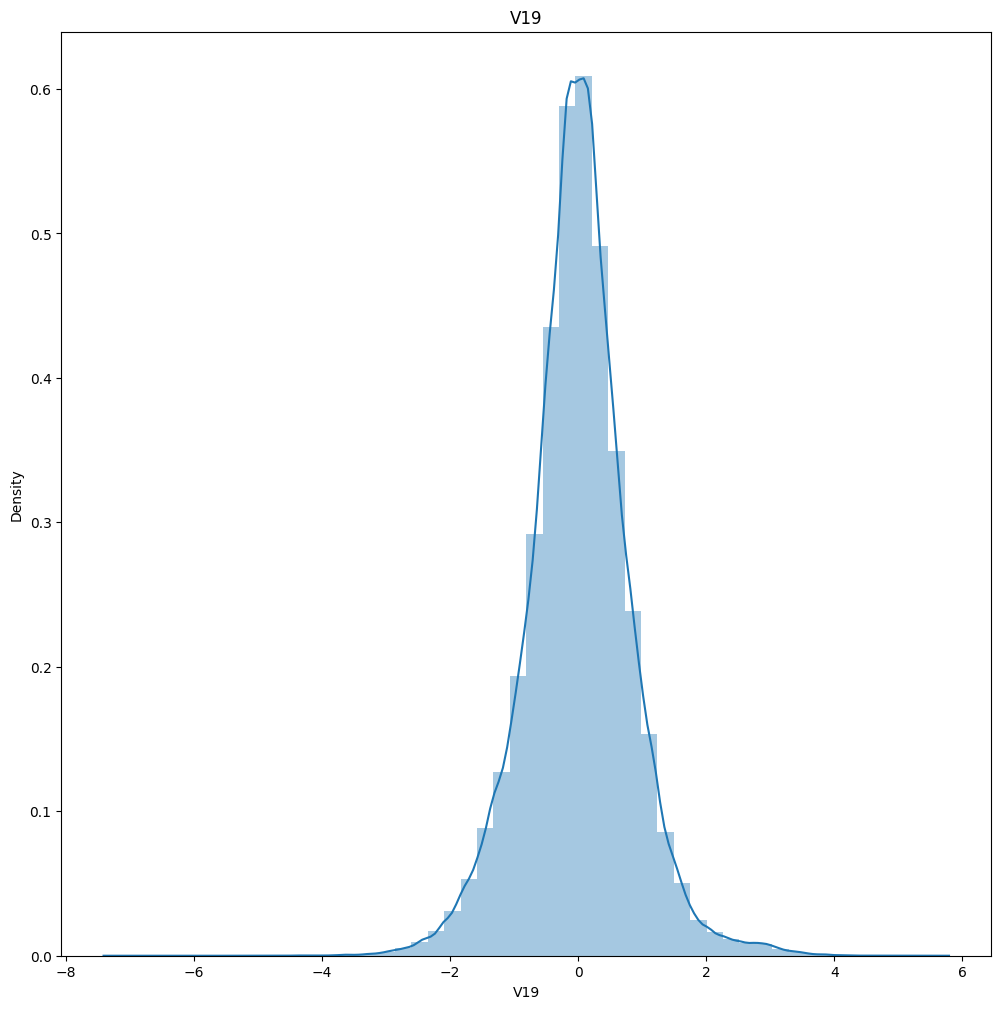

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


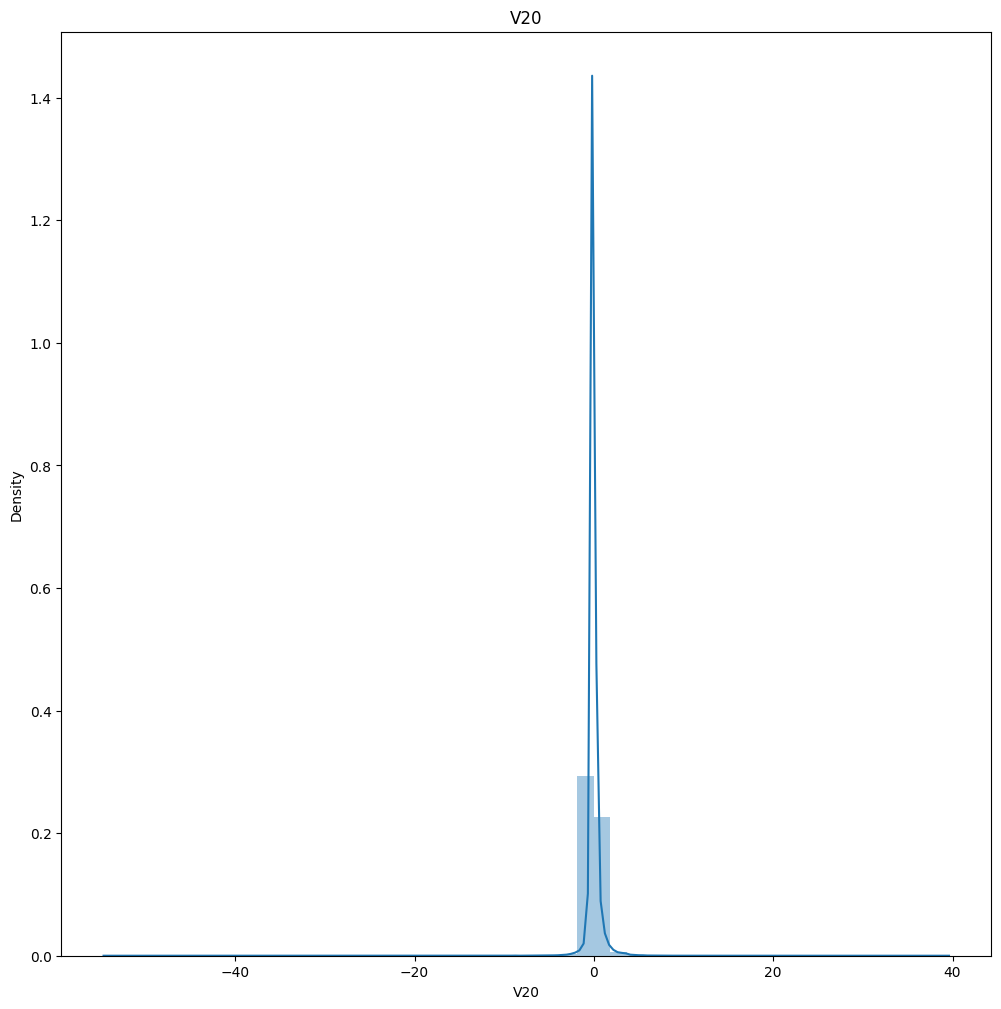

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


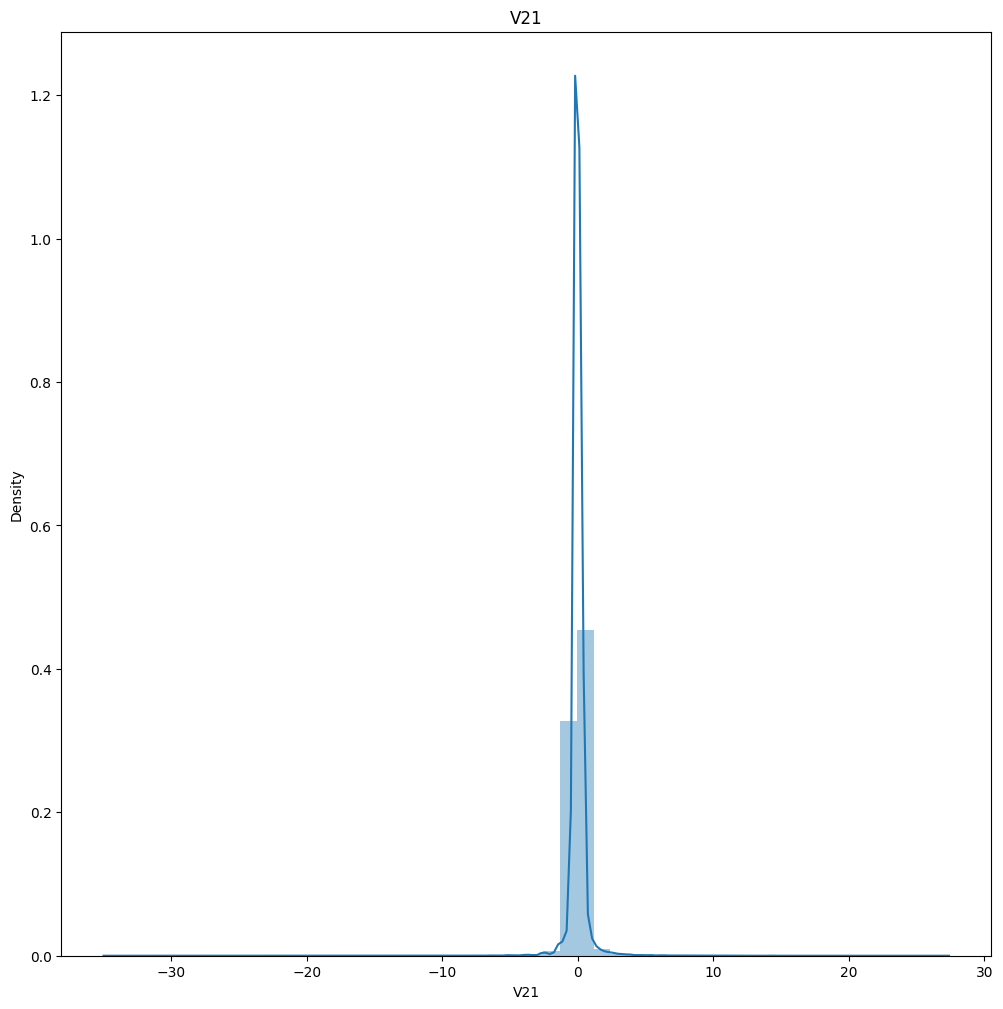

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


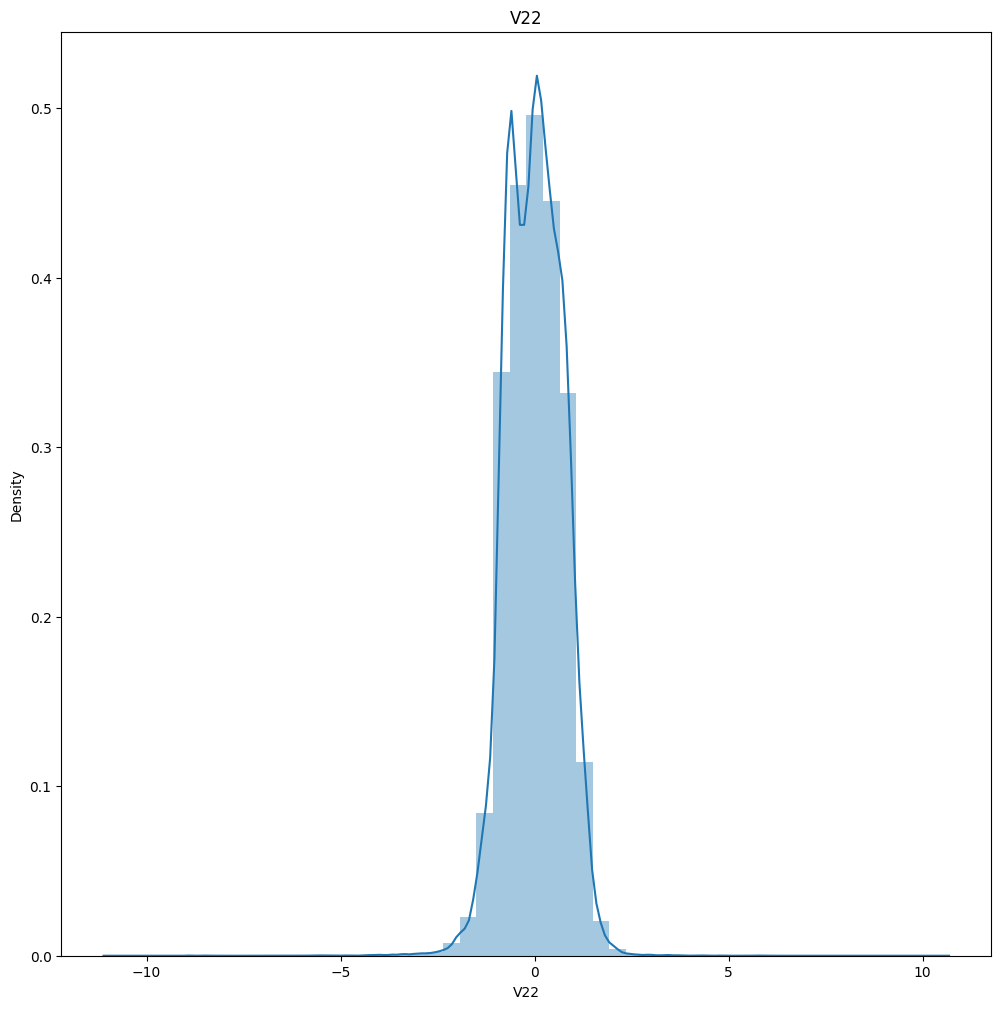

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


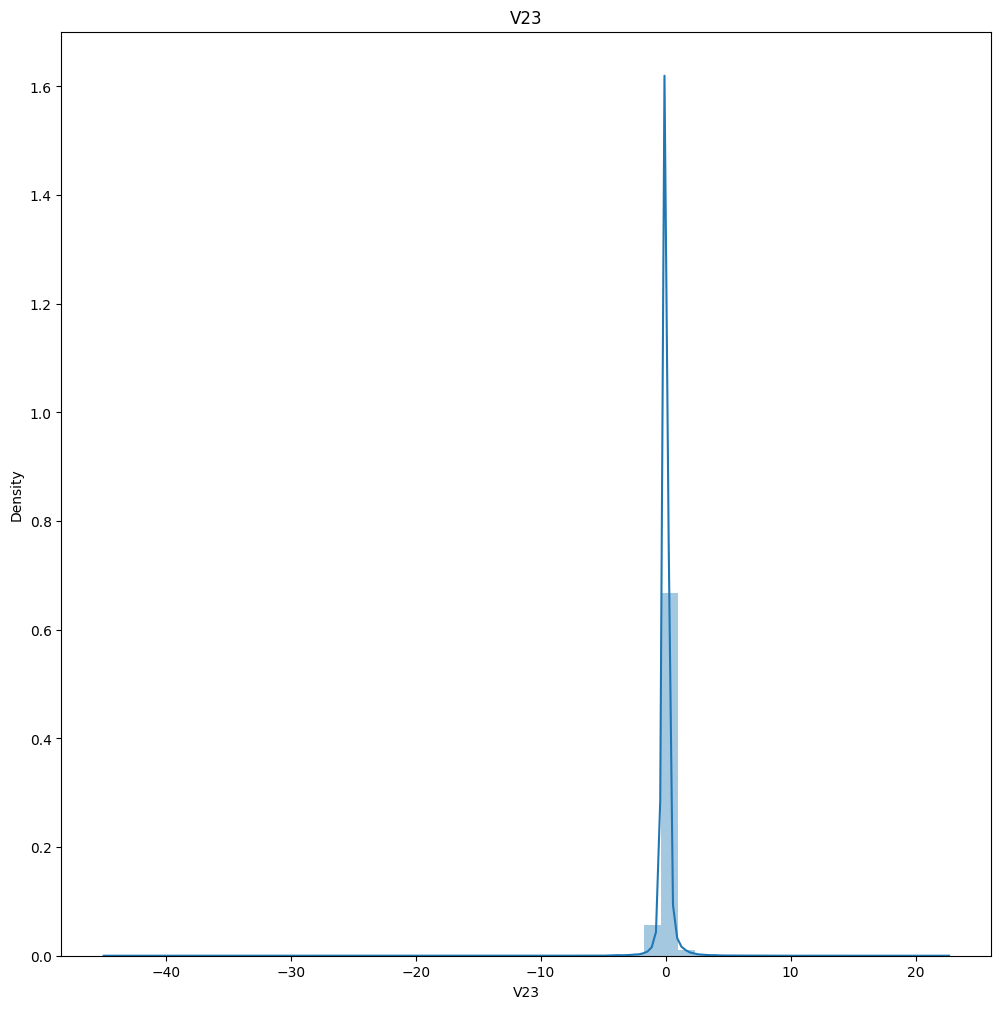

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


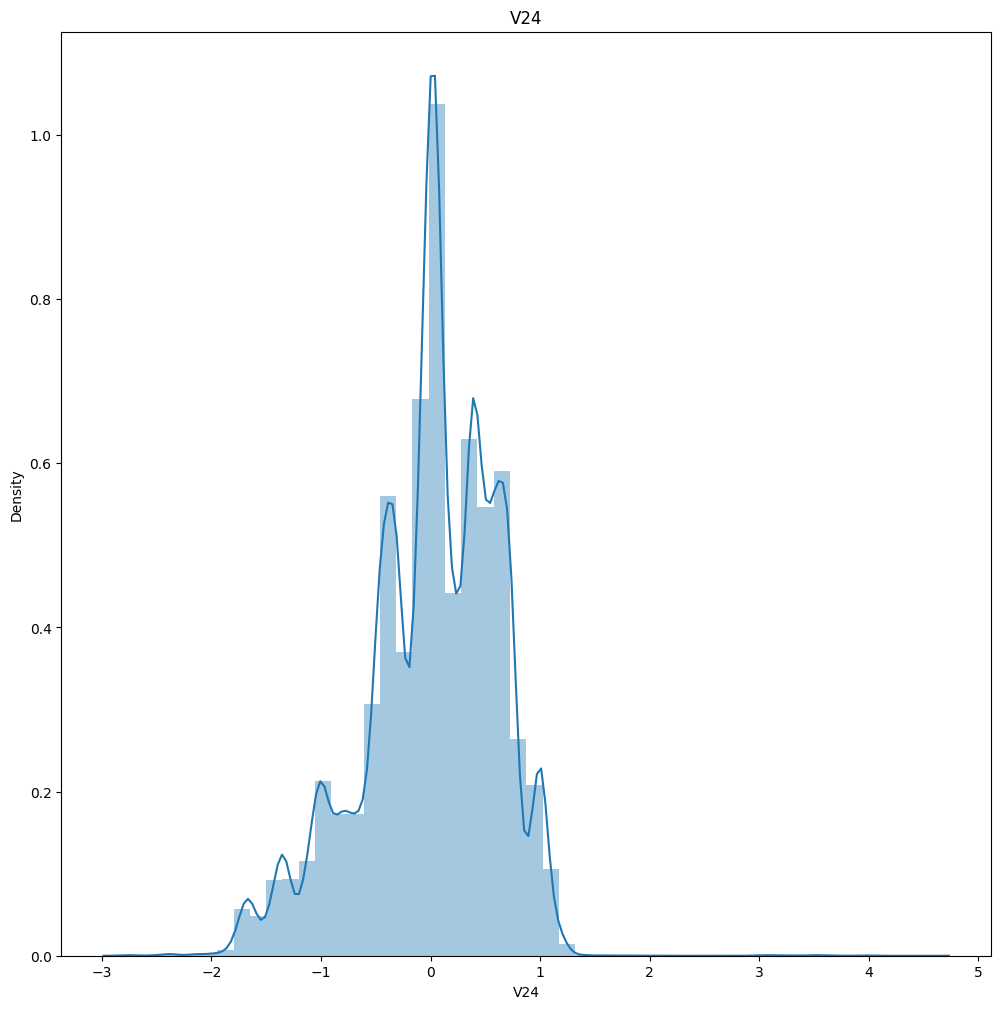

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


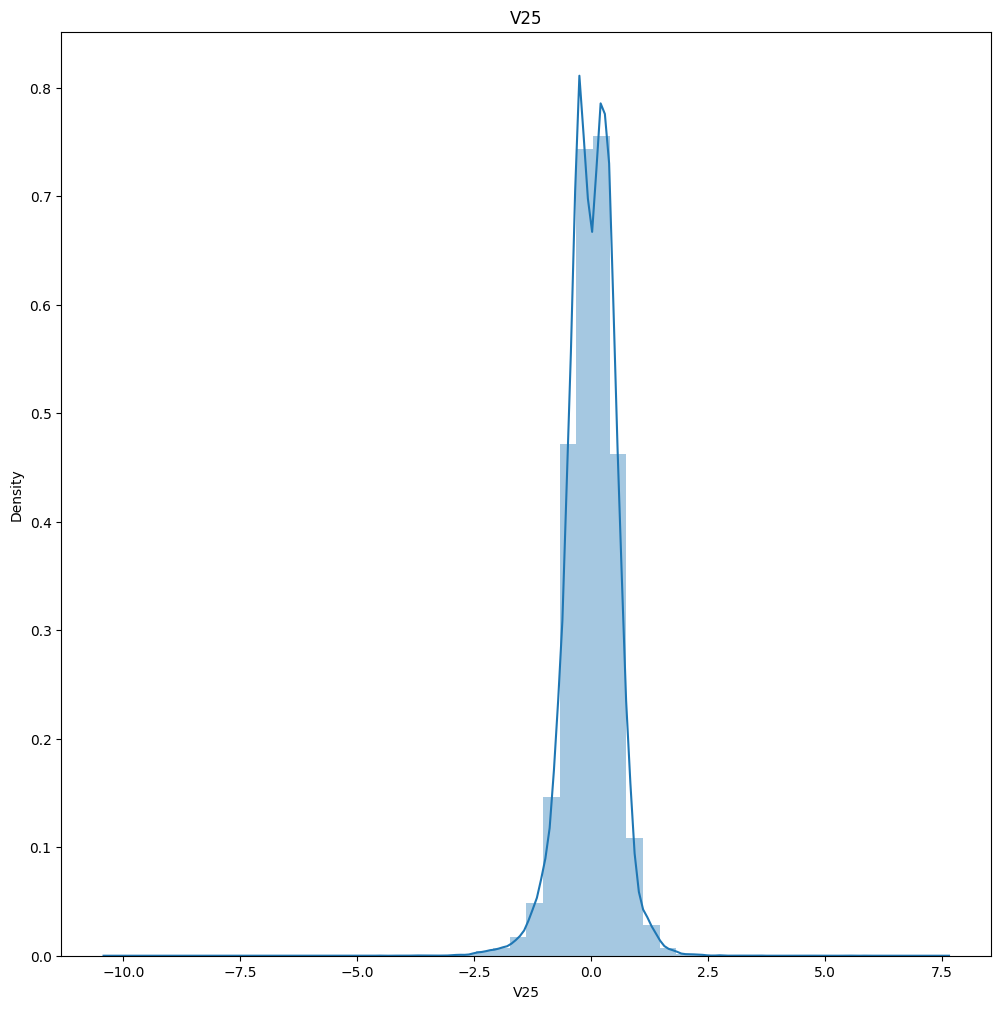

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


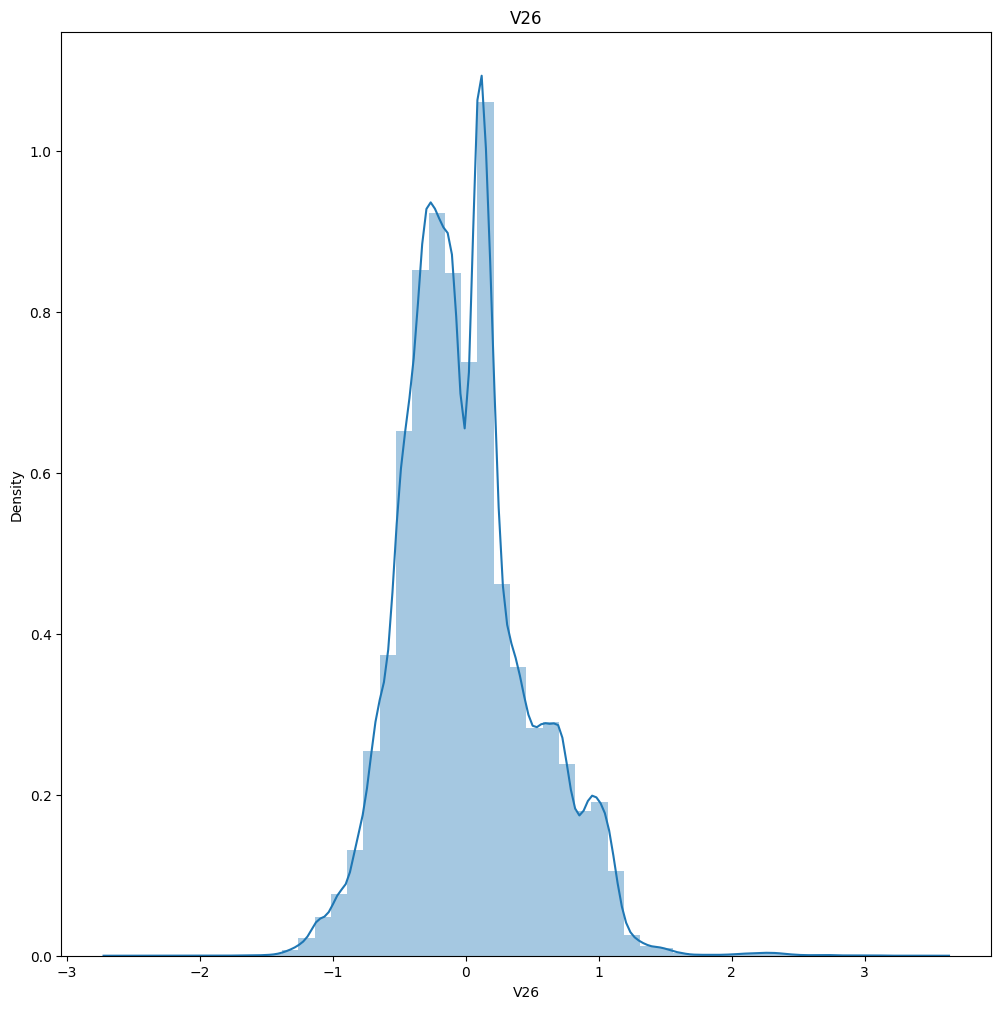

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


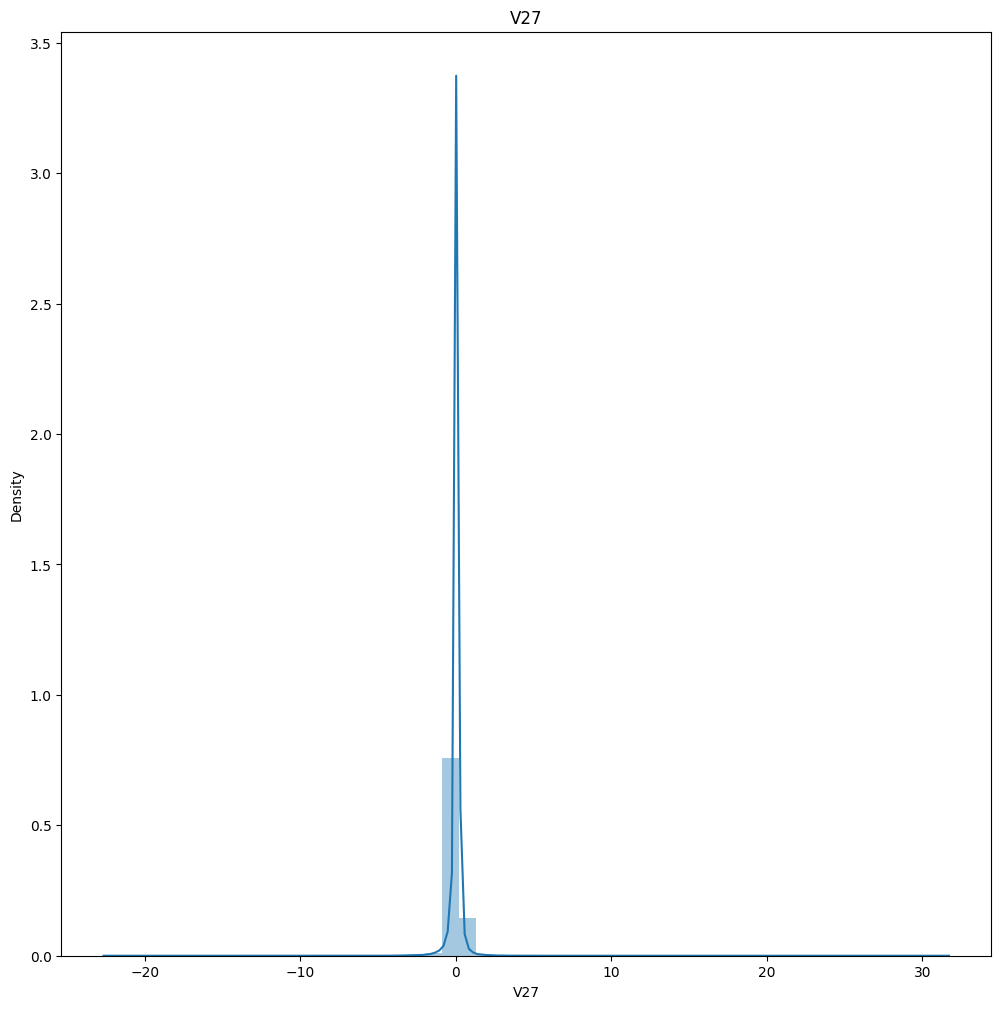

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


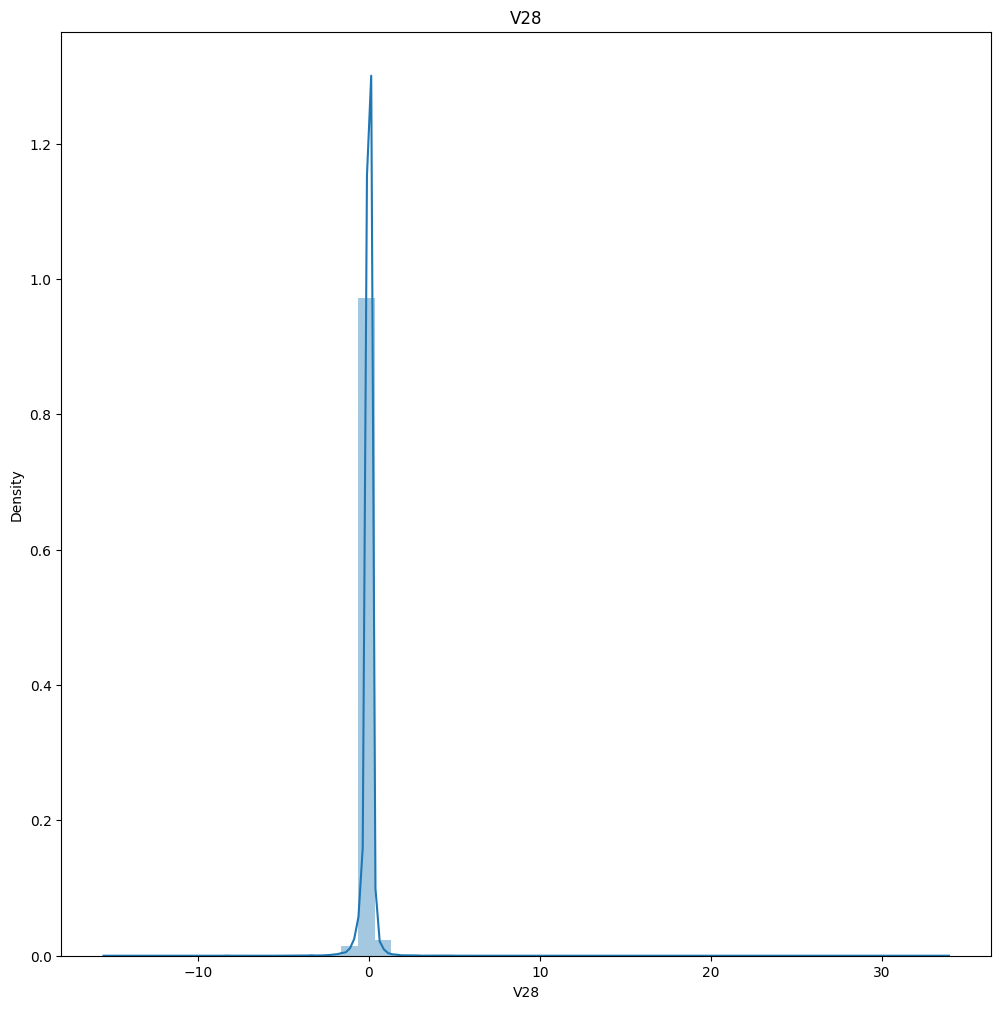

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


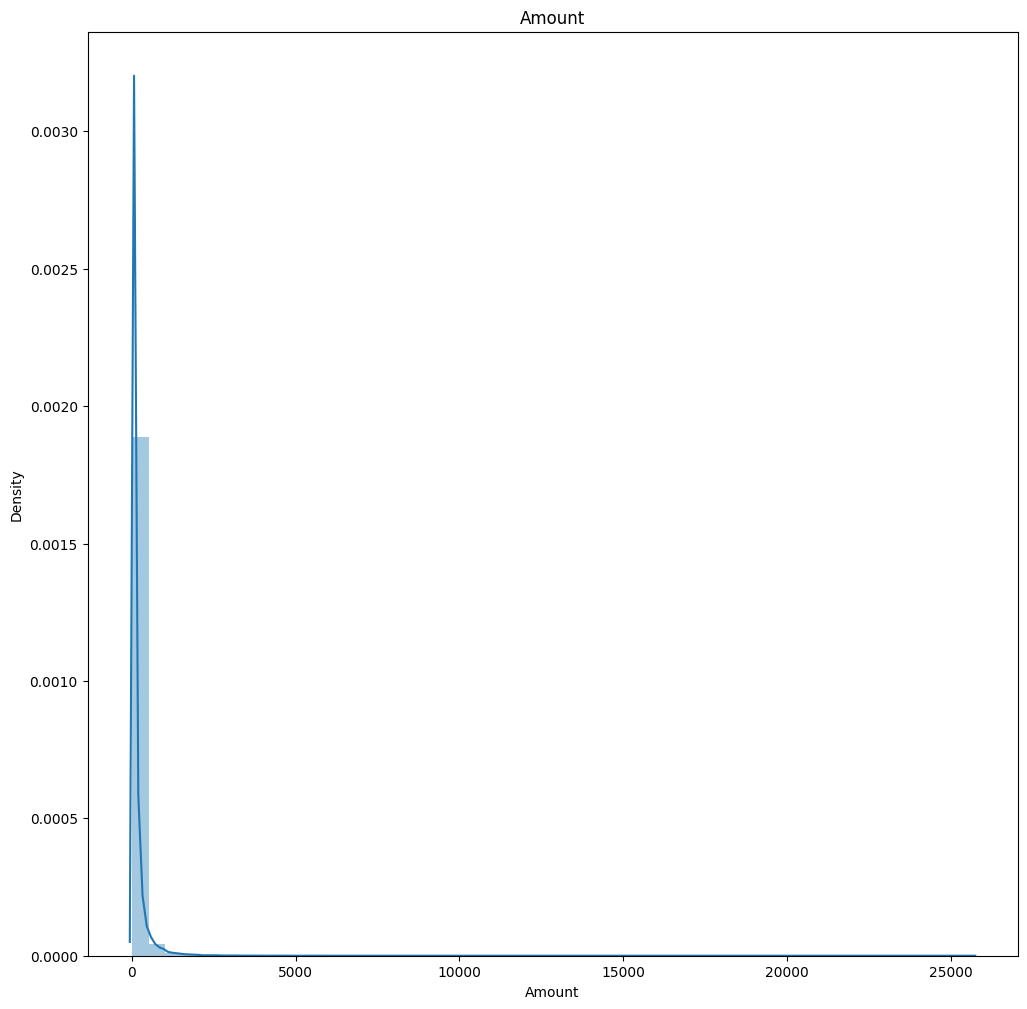

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_80389/1106867370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


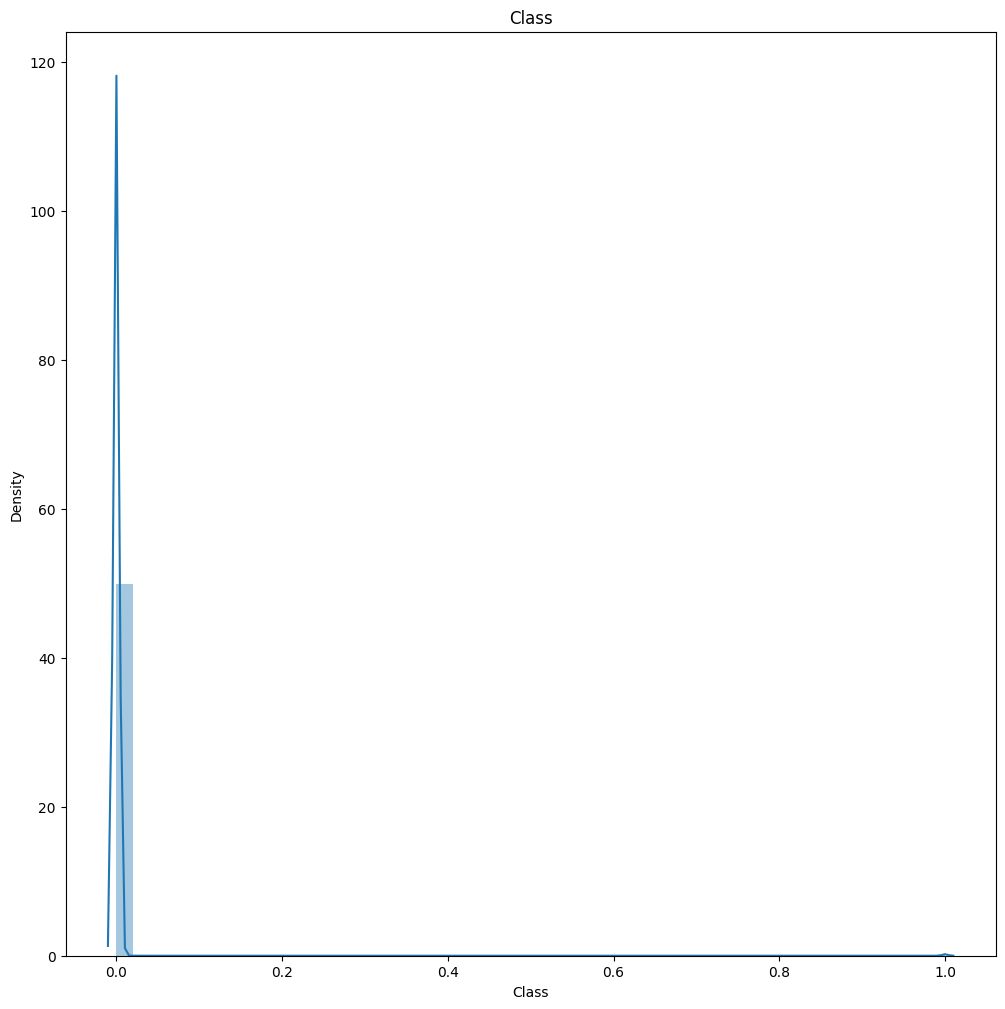

In [116]:
for i in data.loc[:,num_list]:
  plt.figure(figsize=(12,12))
  sns.distplot(data[i])
  plt.title(i)
  plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler
data['Norm_Amount'] = StandardScaler().fit_transform(
data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)
print(f"Few values of Amount column after applying StandardScaler:- \n{data['Norm_Amount'][0:4]}")

Few values of Amount column after applying StandardScaler:- 
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: Norm_Amount, dtype: float64


## Ranges of the predictor variables 

<Axes: >

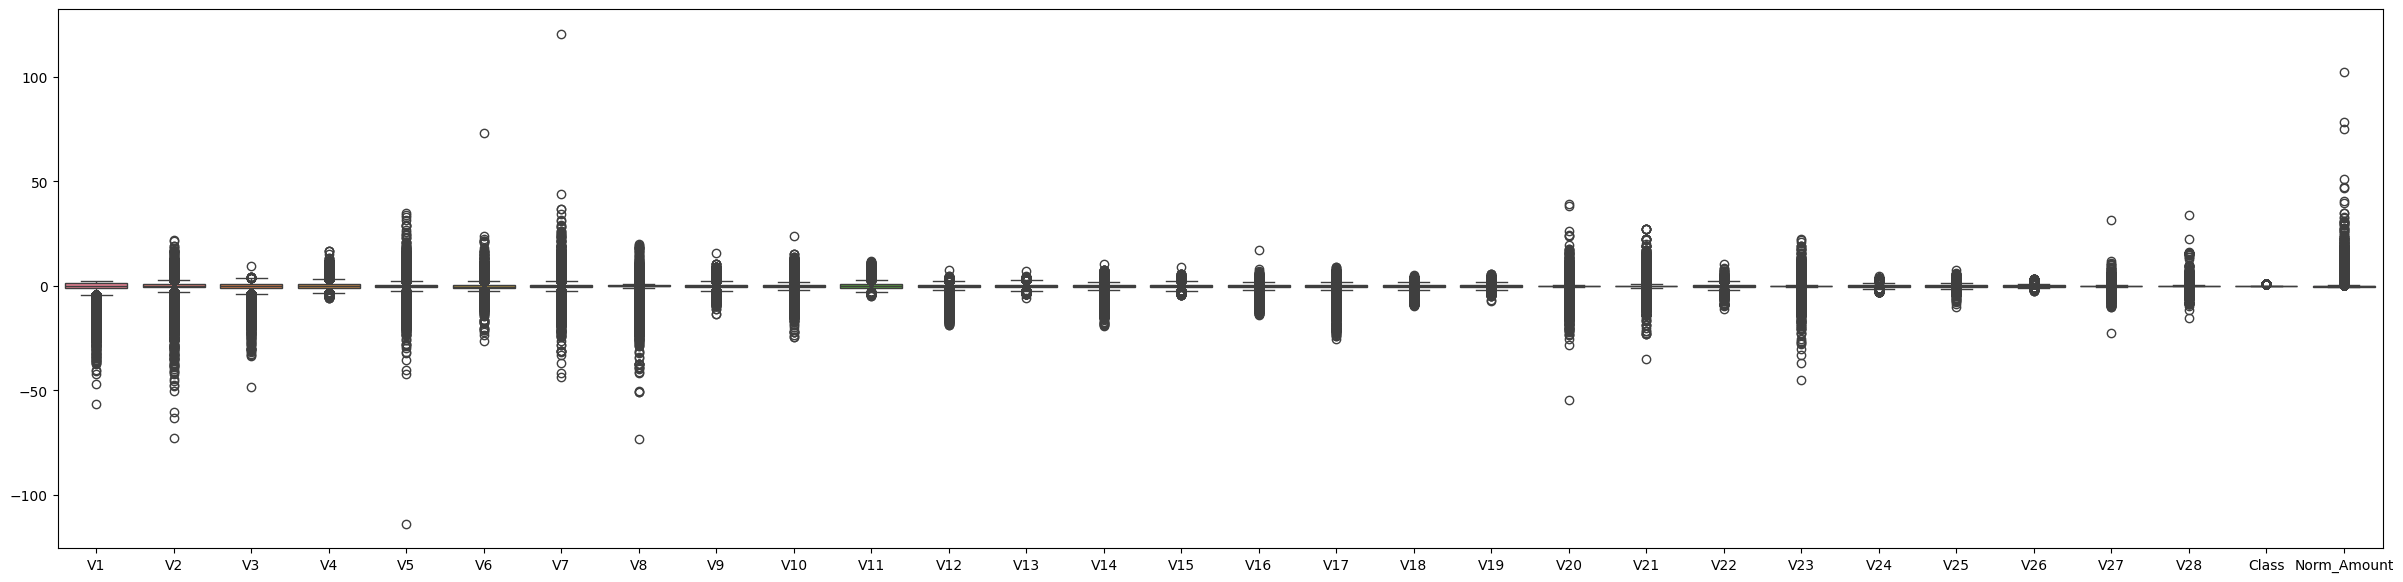

In [118]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(30, 7))
sns.boxplot(data)

## Splitting the dataset

Splitting data into training, validation, and test sets is a crucial step in building machine learning models, as it allows you to train models on one subset of data and evaluate them on unseen data. Here's how you can split data in Python using the popular scikit-learn library.

In [119]:
from sklearn.model_selection import train_test_split
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


##  independent variables  useful to predict a target (dependent variable)

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X1= data.iloc[:,0:30]
y = data.iloc[:,-1]
y=y.astype('int')
# y = pd.DataFrame(y)
y.head(10)
y.describe()

count    284807.000000
mean          0.129976
std           0.873799
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         102.000000
Name: Norm_Amount, dtype: float64

In [121]:
X=X.abs()

In [122]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 8)
fit = bestFeatures.fit(X,y)

In [123]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [124]:
#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,V1,17828.967335
1,V2,124744.173677
2,V3,12597.257959
3,V4,2825.694449
4,V5,63775.565184
5,V6,18742.584034
6,V7,90621.503915
7,V8,5359.300150
8,V9,736.057620
9,V10,2379.947734


##  Important predictor variables 

In [125]:
#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

          Specs          Score
28  Norm_Amount  554462.794962
19          V20  148100.056500
1            V2  124744.173677
22          V23   93006.140203
6            V7   90621.503915
4            V5   63775.565184
5            V6   18742.584034
0            V1   17828.967335
26          V27   13494.948618
20          V21   13122.994321


## Feature Importance

In [126]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [127]:
print(model.feature_importances_)

[0.03097518 0.06163437 0.01515589 0.01236449 0.02042848 0.01312034
 0.03424053 0.01587203 0.01180197 0.01366009 0.00877403 0.00937801
 0.00858447 0.01105628 0.00953265 0.01128803 0.00991866 0.01080227
 0.00998213 0.08718477 0.01524436 0.01132389 0.04399215 0.00967151
 0.01238123 0.01220272 0.01677018 0.01831173 0.45434757]


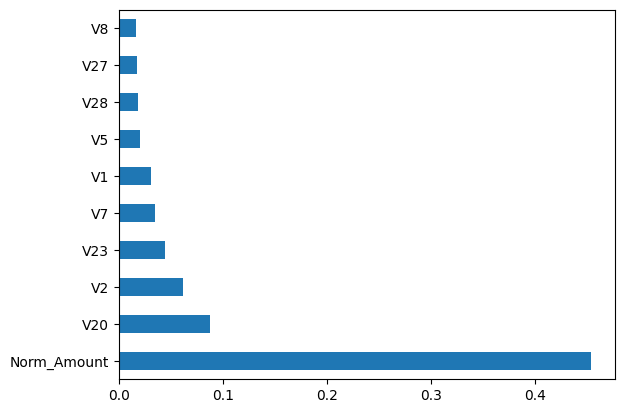

In [128]:
#Plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

## Normalisation 

In [129]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(data)

<Axes: >

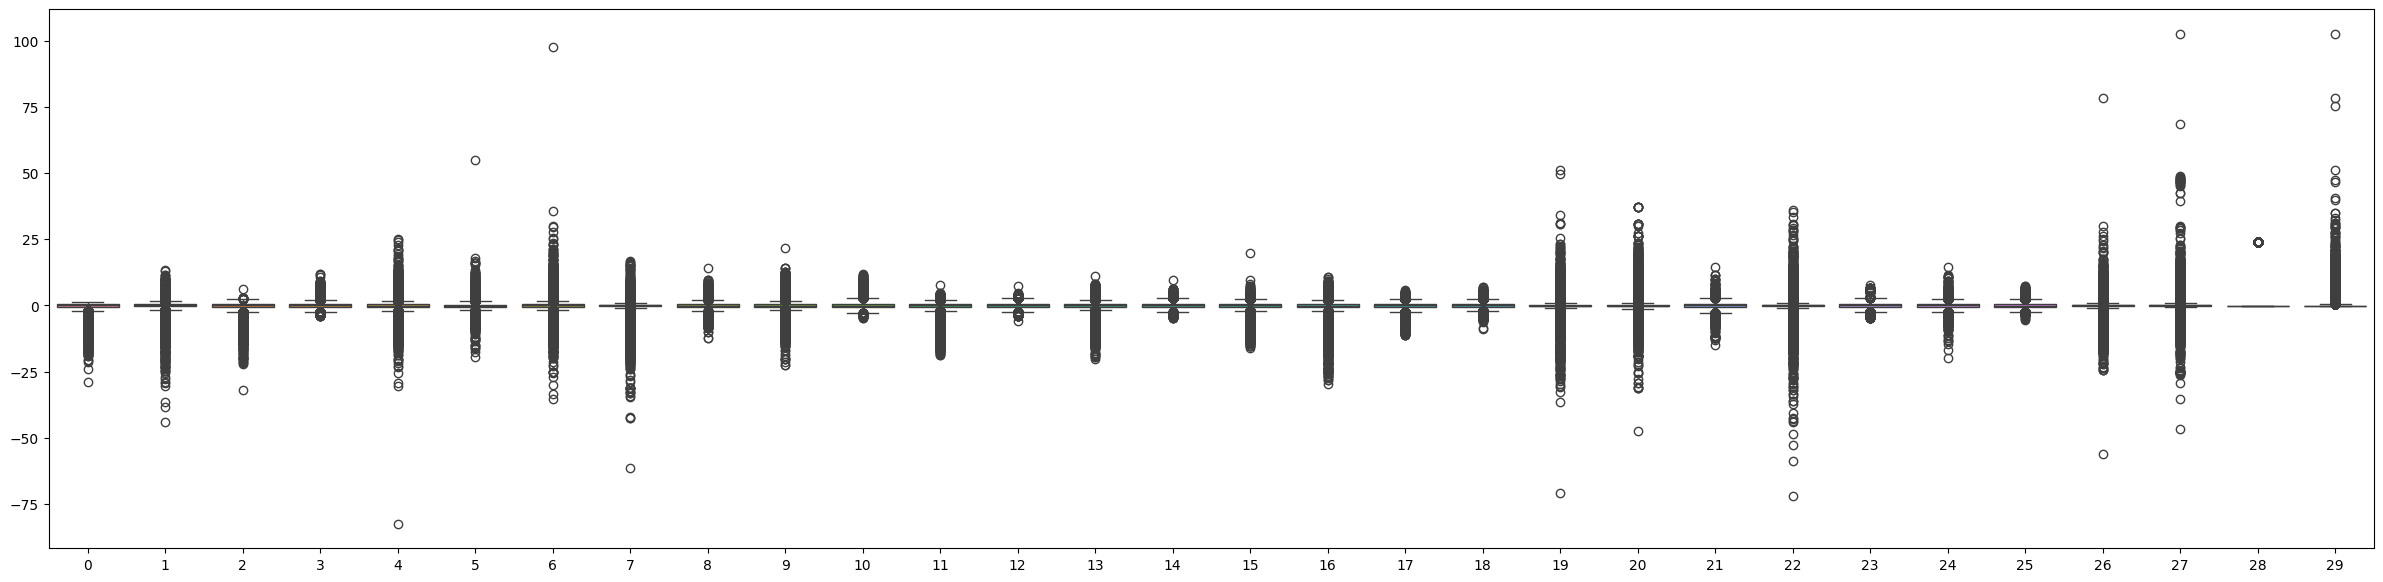

In [130]:
#normalized
plt.figure(figsize=(30, 7))
sns.boxplot(data)

## Outlier Treatment

Outlier treatment is an essential part of data preprocessing, especially in sensitive applications like fraud detection where outliers can either represent anomalies (potential frauds) or errors in data collection.

In [131]:
import numpy as np

def outlier_treatment(data):
    # Identify numeric columns
    numeric_columns = np.arange(data.shape[1])  # Assuming all columns are numeric

    # Loop through each numeric column
    for column_idx in numeric_columns:
        # Calculate the z-score for each data point in the column
        column = data[:, column_idx]
        z_scores = (column - np.mean(column)) / np.std(column)

        # Define the threshold for outliers
        threshold = 3

        # Identify outlier indices
        outlier_indices = np.abs(z_scores) > threshold

        # Replace outlier values with the median
        column[outlier_indices] = np.median(column)

    return data

data = outlier_treatment(data)


<Axes: >

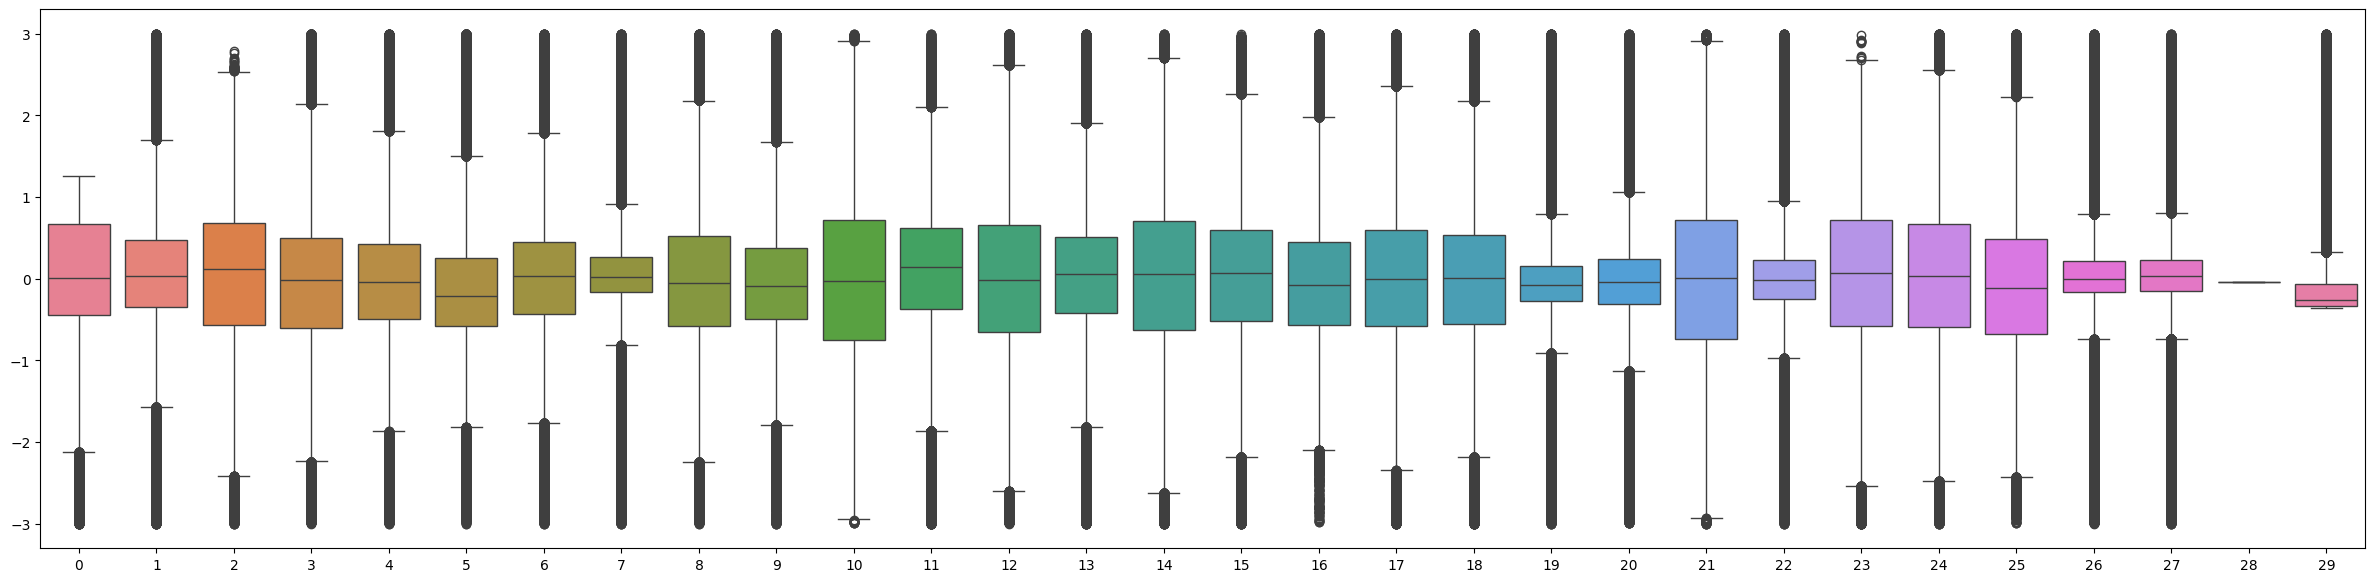

In [132]:
plt.figure(figsize=(30, 7))
sns.boxplot(data)

#  4. Model Building

## **Random Forest Classifier**

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. It is particularly known for its high accuracy, robustness, and ease of use. In the context of fraud detection, Random Forest can handle a large volume of data with numerous variables, capturing important indicators of fraudulent activity without the need for feature scaling.

Model training start........


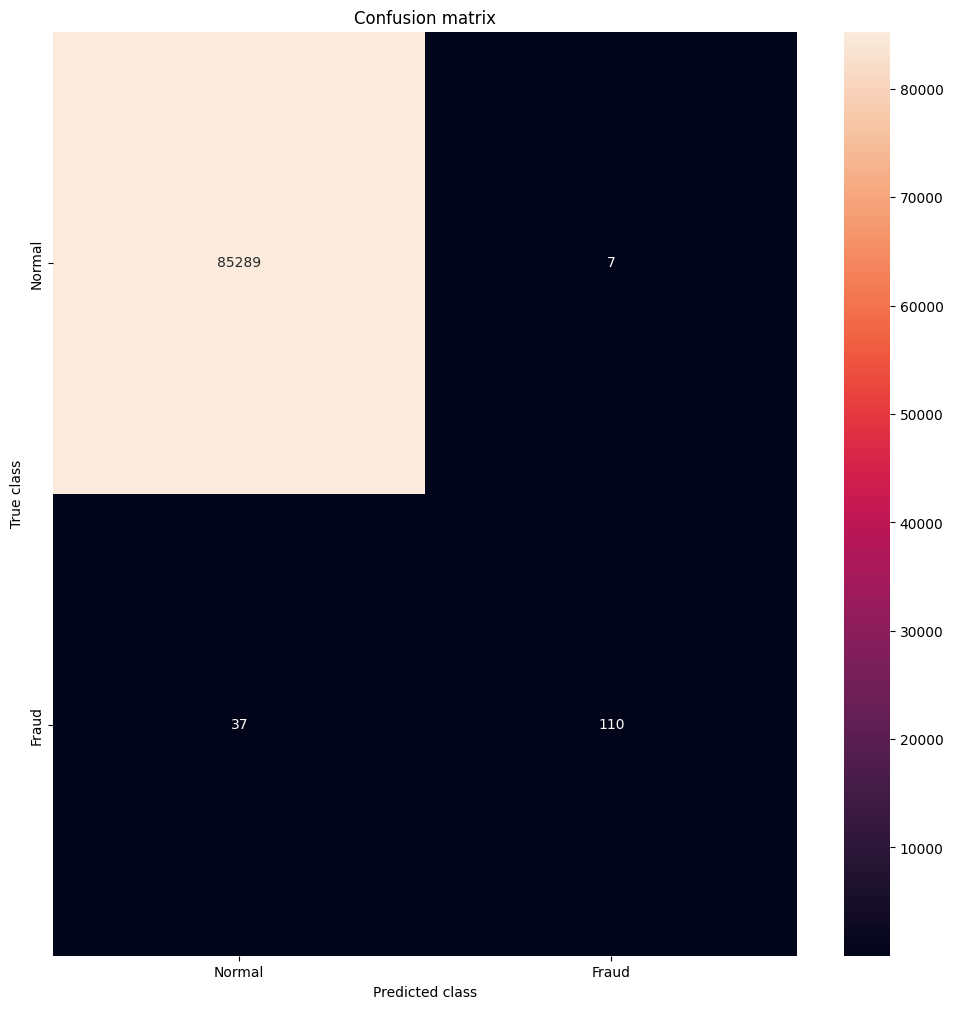

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.8741086262867555


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# initialize object for RandomForestClassifier class
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
print("Model training start........")
rf_classifier.fit(X_train, y_train)
 

 
# predict result using test dataset
y_pred1 = rf_classifier.predict(X_test)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
 
# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred1)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred1)}")

## **ANN**

ANNs are versatile systems that mimic the way human brains operate, allowing them to learn from large amounts of data. ANNs consist of layers of interconnected nodes or neurons, where each connection represents a weight. These weights are adjusted during training so that the network can predict the correct output. For fraud detection, ANNs can learn to distinguish between normal and fraudulent transactions by identifying complex patterns and relationships in the data.

In [134]:
import tensorflow as tf

# Adding layers in ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(input_dim = 29, units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("Model training start........")
ann.fit(X_train, y_train, batch_size = 15, epochs = 10)

Model training start........
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 271us/step - accuracy: 0.9967 - loss: 0.0186
Epoch 2/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 265us/step - accuracy: 0.9994 - loss: 0.0029
Epoch 3/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 256us/step - accuracy: 0.9994 - loss: 0.0026
Epoch 4/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 243us/step - accuracy: 0.9994 - loss: 0.0025
Epoch 5/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 255us/step - accuracy: 0.9996 - loss: 0.0019
Epoch 6/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 242us/step - accuracy: 0.9993 - loss: 0.0024
Epoch 7/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 244us/step - accuracy: 0.9995 - loss: 0.0025
Epoch 8/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 241us/step - accuracy: 0.9995 - loss: 0.0020
Epoch 9/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 244us/step - accuracy: 0.9995 - loss: 0.0020
Epoch 10/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 3s 241us/step - accuracy: 0.9995 - loss: 0.0023


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 187us/step


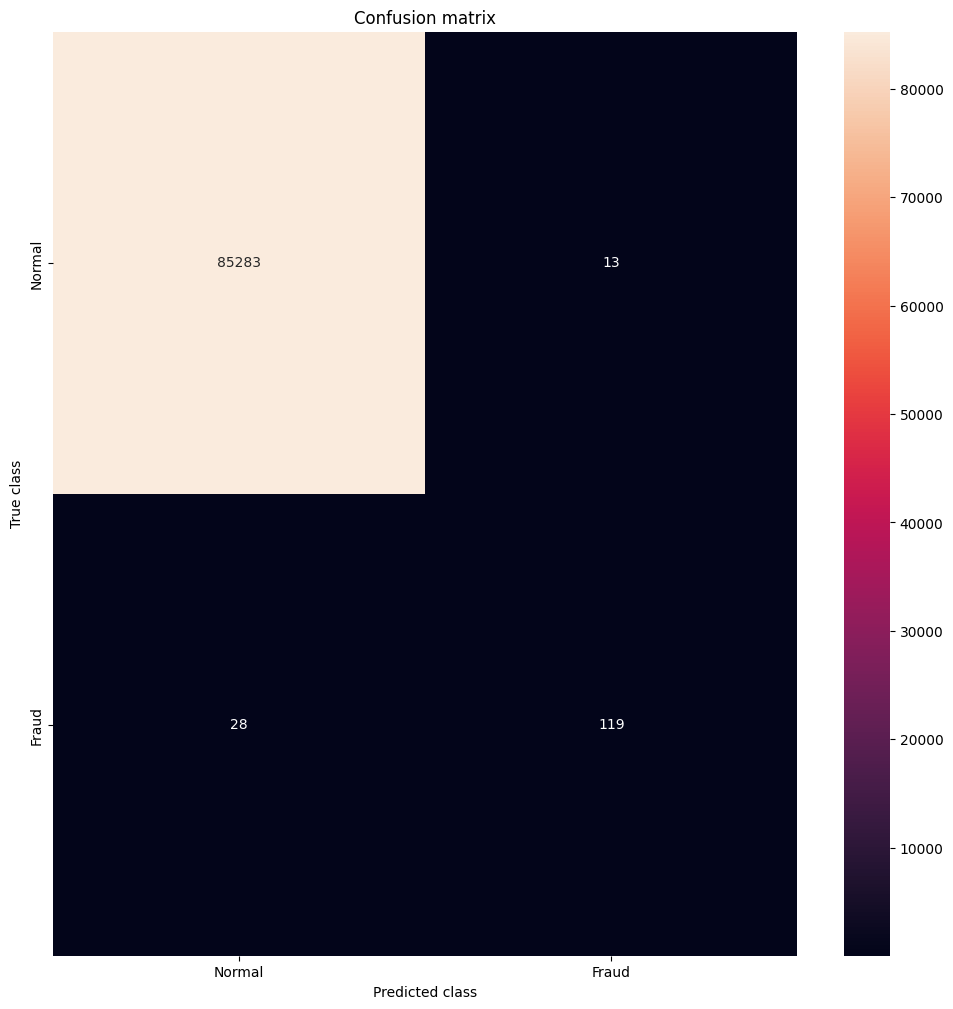

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.81      0.85       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.9046856995471233


In [135]:
# predict result using test dataset
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.5)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred3)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred3)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")


## CNN

CNNs are primarily known for their use in processing grid-like data such as images. However, they can also be effective for sequence data like time series or transactional data, where the locality and translation invariance of features can be beneficial. In fraud detection, CNNs can be used to identify patterns in sequences of transactions that might indicate fraudulent activity.

In [136]:
# CNN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [137]:
# A function to plot the learning curves
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [138]:
#####################################################################################################    
# Constructing the CNN & training phase

# Select the type of the model
model = Sequential()

# Add the first Dense layer with 200 neuron units and ReLu activation function
model.add(Dense(units=200,
                input_dim=29,
                kernel_initializer='uniform',
                activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Add the second Dense layer with 200 neuron units and ReLu activation function
model.add(Dense(units=200,
                kernel_initializer='uniform',
                activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Add the second Dense layer with 1 neuron units and Sigmoid activation function
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

# Print out the model summary
print(model.summary())

# Configure the learning process by selecting 'Binary cross tropy' as a loss function
# 'Adam' as a optimization function, and to optimize the 'Accuracy matrix'  
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fit the model by pass 'train_feature_trans' as input for X, 'train_lable' as input for y
# number of epochs = 200 and batch size = 500
train_history = model.fit(X_train, y_train, validation_split=0.8, batch_size = 50, epochs = 20, verbose=2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 200)            │         6,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,401 (181.25 KB)

 Trainable params: 46,401 (181.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
798/798 - 2s - 2ms/step - accuracy: 0.9979 - loss: 0.0212 - val_accuracy: 0.9983 - val_loss: 0.0044
Epoch 2/20
798/798 - 1s - 2ms/step - accuracy: 0.9983 - loss: 0.0045 - val_accuracy: 0.9983 - val_loss: 0.0050
Epoch 3/20
798/798 - 1s - 2ms/step - accuracy: 0.9989 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 4/20
798/798 - 1s - 2ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 5/20
798/798 - 1s - 2ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 6/20
798/798 - 1s - 2ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 7/20
798/798 - 1s - 2ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 8/20
798/798 - 1s - 2ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 9/20
798/798 - 1s - 2ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0

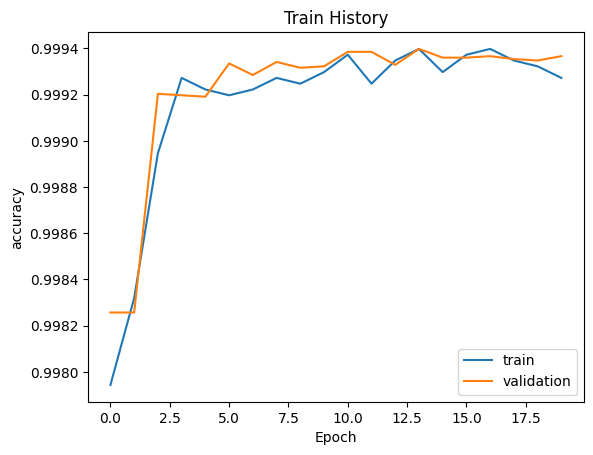

In [139]:
# Print out the accuracy curves for training and validation sets
show_train_history(train_history, 'accuracy', 'val_accuracy')

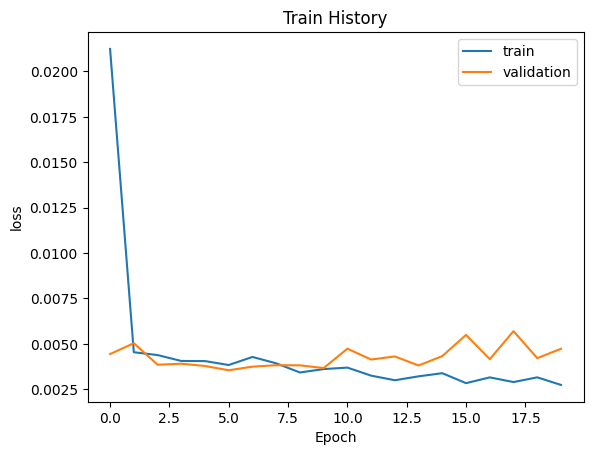

In [140]:
 # Print out the loss curves for training and validation sets
show_train_history(train_history, 'loss', 'val_loss')

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step


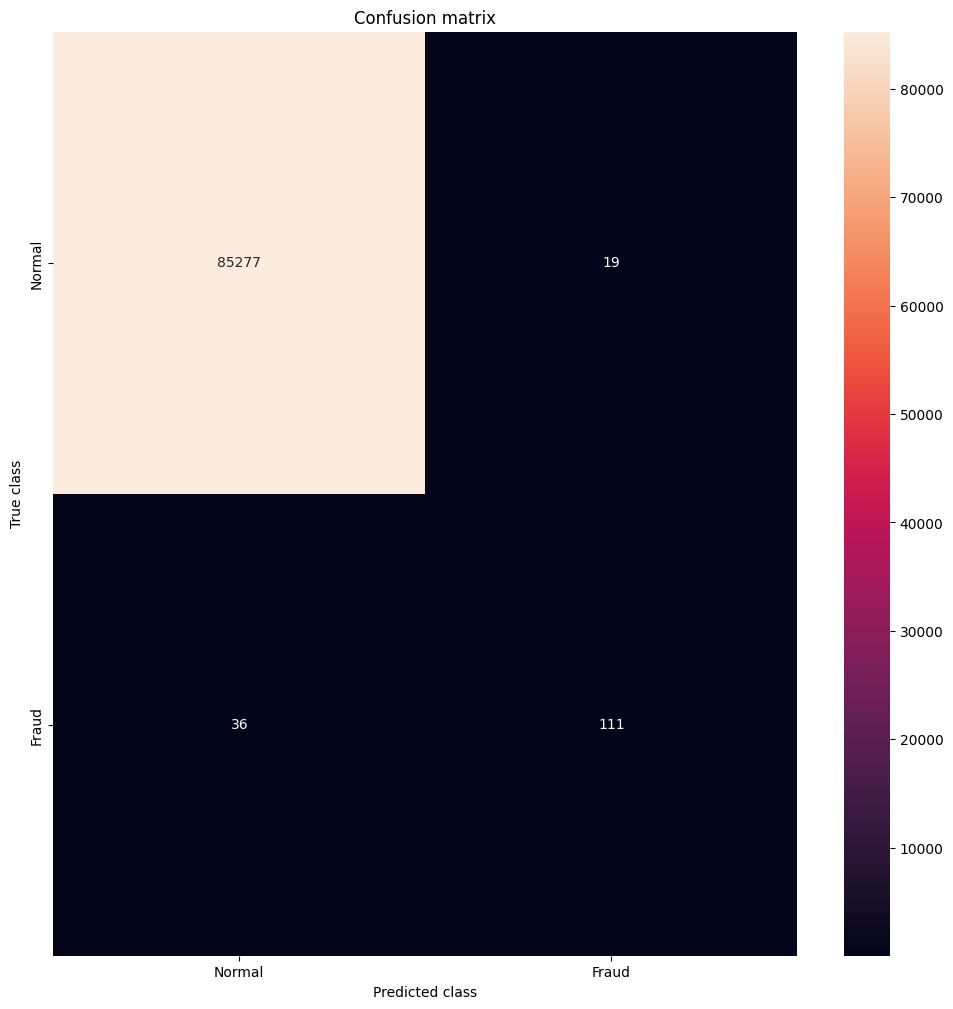

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.76      0.80       147

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443

AROC score :- 
 0.8774396435557904


In [141]:
# predict result using test dataset
y_pred4 = model.predict(X_test)
y_pred4 = (y_pred4 >= 0.5)



# confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred4)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred4)}")
 
# area under roc curve
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred4)}")

# **Majority Voting Ensemble Classifier**

Majority Voting Ensemble is a popular ensemble technique that combines the predictions of multiple individual models to make a final prediction. In Majority Voting, each model in the ensemble gets a vote, and the final prediction is determined by the majority of votes.

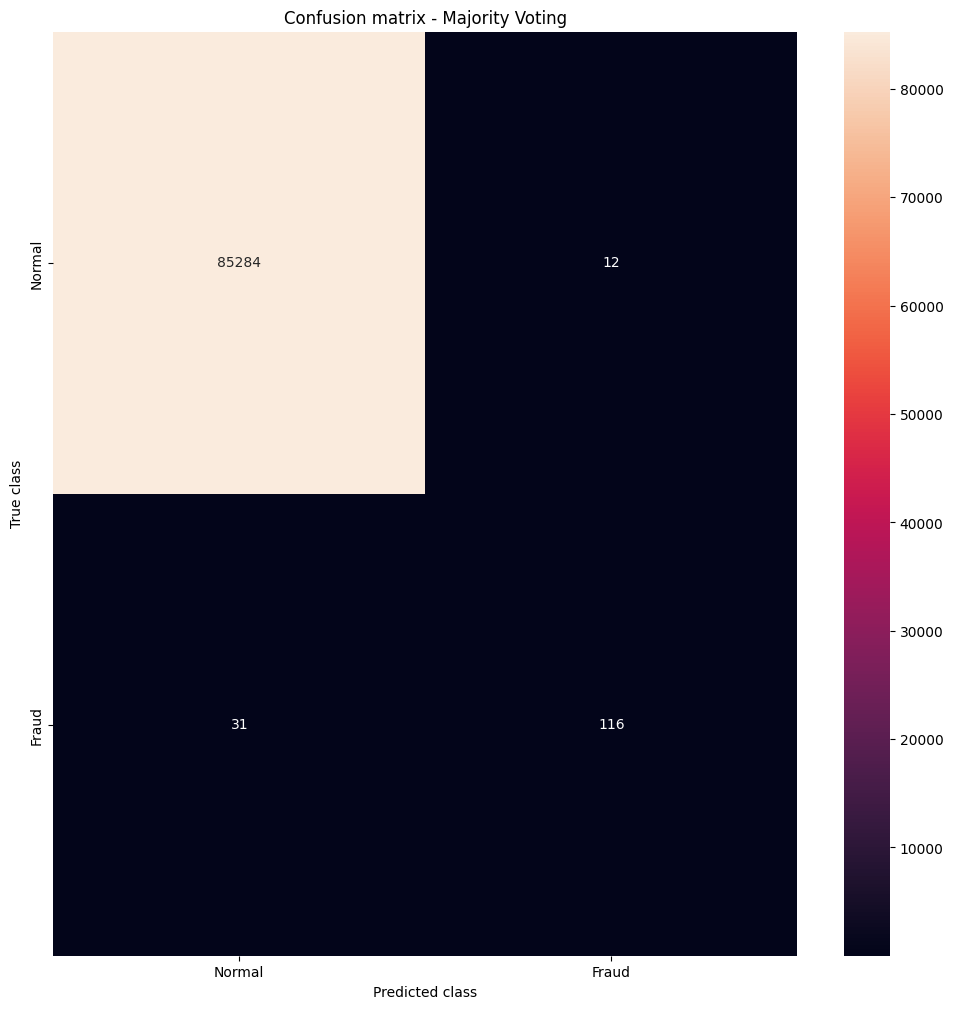

Classification Report - Majority Voting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.79      0.84       147

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AROC score - Majority Voting: 0.8944874798540688


In [142]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the predictions
res = np.concatenate((
    y_pred1.reshape(len(y_pred1), 1),
    y_pred3.reshape(len(y_pred3), 1),
    y_pred4.reshape(len(y_pred4), 1)
), 1)

# Perform majority voting
list1 = []
for i in range(len(res)):
    c1 = np.sum(res[i] == 1)
    c2 = np.sum(res[i] == 0)
    
    if c1 > c2:
        list1.append(1)
    else:
        list1.append(0)

# Ensure y_test and list1 have the same number of samples
y_test = y_test[:len(list1)]

# Compute the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, list1)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion matrix - Majority Voting')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Compute and print the classification report
print(f"Classification Report - Majority Voting:\n{classification_report(y_test, list1)}")

# Compute and print the ROC AUC score
print(f"AROC score - Majority Voting: {roc_auc_score(y_test, list1)}")


# SHAP Analysis on Random Forest

Using SHAP (SHapley Additive exPlanations) to interpret the predictions of a Random Forest model can provide insightful explanations about the contribution of each feature to the prediction outcome. SHAP values measure the impact of each feature on the prediction relative to the average prediction over the dataset. 

In [143]:
import shap
shap.initjs()

In [145]:
from sklearn.pipeline import Pipeline
explainer = shap.Explainer(rf_classifier.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 85444it [20:34, 68.66it/s]                              


In [146]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

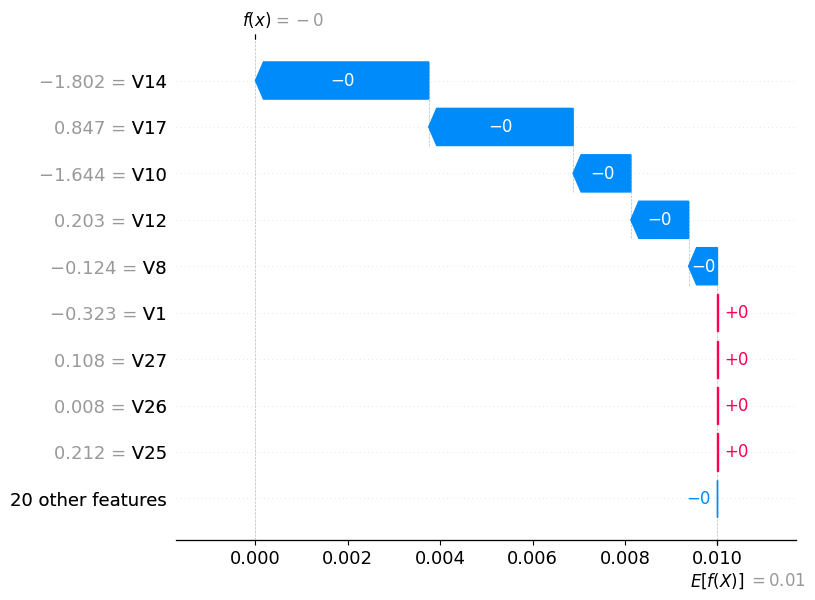

In [147]:
sample_feature_importance(0, 'waterfall')

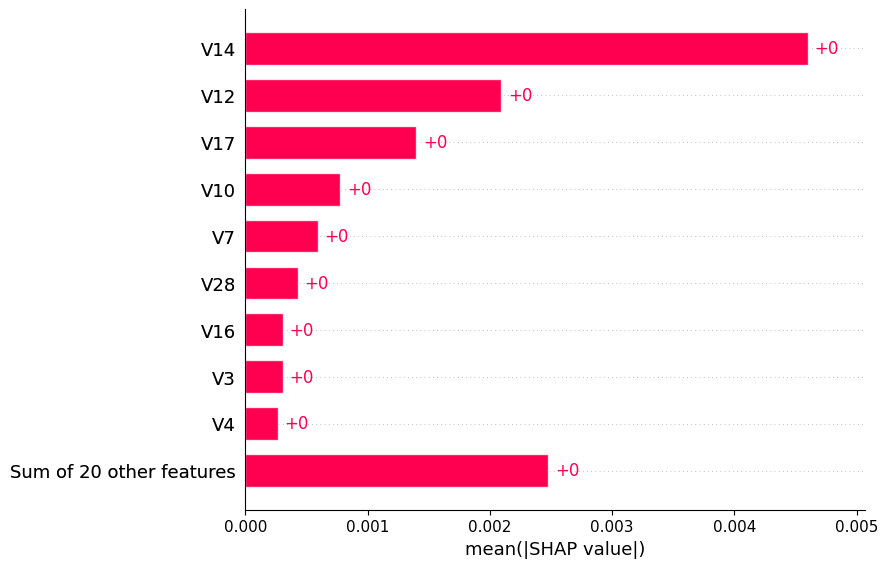

In [148]:
shap.plots.bar(shap_values)

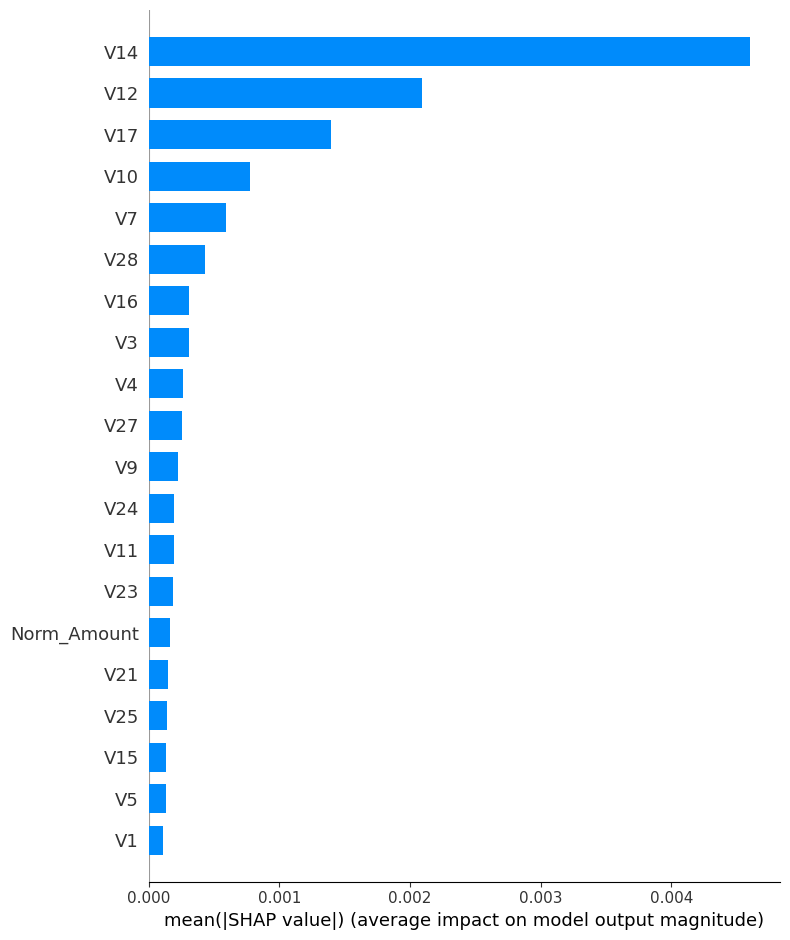

In [149]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

## REFERENCES

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html


https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

https://shap.readthedocs.io/en/latest/tabular_examples.html

## LICENSE

MIT License

Copyright (c) 2024 Sathwik Reddy Chelemela

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.